### Descarga de los datos.

In [94]:
from wget import download
from os import path, listdir

if not path.exists("Covers.csv"):
    download("https://drive.google.com/uc?export=download&id=1SpdzWWus6tlZFRpYiEa-QNqFRrkTDp5K")
else:
    print("No vamos a bajar el archivo porque ya existe!")

if not path.exists("CoversYouTubeMusic.docx"):
  download("https://docs.google.com/document/d/1rlGmjOq0Qt-f0KlB6LQZ-r26z5t-Ug7sXc8_jLYd-bc/export?format=docx")
else:
  print("No vamos a bajar el archivo porque ya existe!")

lista_archivos = listdir("./")
print(f"El contenido de la carpeta es: {lista_archivos}")

No vamos a bajar el archivo porque ya existe!
No vamos a bajar el archivo porque ya existe!
El contenido de la carpeta es: ['.git', '.venv', '.vscode', 'Covers.csv', 'CoversYouTubeMusic.docx', 'requirements.txt', 'TPEamb', 'TPEspecial.ipynb']


In [95]:
import pandas as pd

dataset_covers = pd.read_csv("Covers.csv")

dataset_covers

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,I’m Your Angel,R. Kelly and Celine Dion,3:12,4,0.648,0.331,4,-10.952,1,0.0274,0.7760,0.000445,0.1260,0.507,98.572,28,1999
915,Taking Everything,Gerald Levert,5:25,4,0.689,0.710,3,-5.395,0,0.0413,0.0886,0.000000,0.1070,0.306,113.722,26,1999
916,What’s It Gonna Be?!,Busta Rhymes featuring Janet,2:41,4,0.710,0.742,9,-4.699,0,0.0339,0.1780,0.000064,0.0800,0.504,127.969,26,1999
917,Almost Doesn’t Count,Brandy,3:38,4,0.682,0.543,0,-7.063,0,0.0454,0.4940,0.000000,0.1580,0.478,71.582,19,1999


### Analisis Basico.

Realizamos un análisis general del dataset para comprender su estructura, identificar valores faltantes o inconsistentes, y detectar registros que puedan necesitar procesamiento adicional o eliminación. Este paso inicial es clave para planificar tratamientos como la imputación de datos nulos, la normalización o la exclusión de registros irrelevantes. Así, aseguramos que el dataset esté en óptimas condiciones para un análisis profundo y conclusiones confiables.

In [96]:
dataset_covers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

 Podemos ver que se trata de un archivo con 17 columnas y 919 registros, los cuales, por el momento, no hay presencia de nulos. La mayoria de la variables son cuantitativas, ya sean discretas o continuas, con la exepcion de tres de tipo object, que las cosideramos de tipo String.

Una de las variables de tipo Object se denomina "Duration", la cual da a entender que se trata de una variable cuantitativa continua, ya que representaria un tiempo. Por lo tanto, se concideraria hacer un transformacion, para un analisis mas profundo de esta.

#### Comprobamos que no allá duplicados

In [97]:
# contamos la cantidad de duplicados
dataset_covers.duplicated().sum()

np.int64(0)

El dataset no cuenta con ningun registro duplicado.

### Analisis de cada variable del conjunto.

Vamos a realizar un análisis univariado para la exploración de datos, que se centra en examinar cada variable de manera individual. Con el objetivo principal es comprender las características básicas de cada variable, como su distribución, medidas de tendencia central (media, mediana), dispersión (desviación estándar, rango) y la presencia de valores atípicos. Tambien realizamos tratamiento tanto para la variable, como para valores a tipicos, para poder hacer un analisis mas profundo despues.

In [98]:
dataset_covers.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,3.947769,0.622967,0.623548,5.412405,-8.349071,0.655060,0.075793,0.230068,0.052947,0.171865,0.531424,118.711789,57.722524,1994.405876
std,0.286769,0.154782,0.203975,3.514783,3.892821,0.475608,0.079570,0.256284,0.180214,0.138296,0.246091,29.684070,17.599522,2.926405
min,1.000000,0.135000,0.001340,0.000000,-42.950000,0.000000,0.023000,0.000004,0.000000,0.025000,0.006720,48.718000,0.000000,1990.000000
25%,4.000000,0.518500,0.479500,2.000000,-10.166500,0.000000,0.032400,0.029700,0.000000,0.089200,0.341500,96.924000,49.000000,1992.000000
50%,4.000000,0.631000,0.639000,6.000000,-7.599000,1.000000,0.042900,0.120000,0.000006,0.118000,0.535000,115.010000,60.000000,1994.000000
75%,4.000000,0.738000,0.780000,9.000000,-5.751000,1.000000,0.075600,0.344500,0.000741,0.217500,0.728500,133.424000,70.000000,1997.000000
max,5.000000,0.979000,0.999000,11.000000,0.919000,1.000000,0.529000,0.995000,0.987000,0.965000,0.975000,219.973000,92.000000,1999.000000


In [99]:
dataset_covers.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


##### Track : El titulo de la cancion

In [100]:
dataset_covers['Track'].value_counts()

Track
Hold On                    3
I’ll Be There              2
Crazy                      2
Always                     2
Everything                 2
                          ..
I’m Your Angel             1
Taking Everything          1
What’s It Gonna Be?!       1
Almost Doesn’t Count       1
It Ain’t My Fault 1 & 2    1
Name: count, Length: 892, dtype: int64

Se trata de una variable cualitativa nominal. No se han encontrado valores fura de lo normal que puedan identificarse como nulos. Además, al representar los títulos de las canciones, no se observa que alguno de ellos aparezca con mucha frecuencia.

#### Artist : El nombre del artista

In [101]:
dataset_covers["Artist"].value_counts()

Artist
Mariah Carey                       16
Madonna                            14
Janet Jackson                      13
Boyz II Men                        11
Whitney Houston                    10
                                   ..
112 featuring Lil Zane              1
LFO                                 1
Jive Bunny and the Mastermixers     1
Biz Markie                          1
the Righteous Brothers              1
Name: count, Length: 535, dtype: int64

Se trata de una variable cualitativa nominal. No se han encontrado valores fura de lo normal que puedan identificarse como nulos. Además, al representar los nombres de los artistas, no se observa que alguno de ellos aparezca con mucha frecuencia.

#### Duration : la duración de la canción, medida en minutos y segundos.

Esta variable es de tipo object (SString), para poder hacer un mejor analisis de esta la vamos a tranformar para que sea cuantitaviva continua.

In [102]:
dataset_covers_procesado = dataset_covers.copy()
dataset_covers_procesado['Duration'] = dataset_covers_procesado['Duration'].replace(':', '.', regex=True).astype(float)

In [103]:
dataset_covers_procesado['Duration'].value_counts()

Duration
3.48    12
3.55    12
4.18    11
3.59    11
3.38    10
        ..
4.06     1
2.55     1
2.46     1
2.07     1
4.46     1
Name: count, Length: 253, dtype: int64

Para esta transformación, se realizó una copia del dataset original (dataset_covers) con el fin de aplicar los cambios sin afectar el archivo original.

Los datos de la variable "Duration" se encuentran guardados en el formato "minutos : segundos". Dado que el uso del carácter ":" convierte la cadena en un tipo no numérico, se decidió reemplazar el ":" por un "." para facilitar su conversión a un formato numérico.

In [104]:
dataset_covers_procesado['Duration'].describe()

count    919.000000
mean       3.829075
std        1.029694
min        0.510000
25%        3.245000
50%        4.010000
75%        4.360000
max        9.420000
Name: Duration, dtype: float64

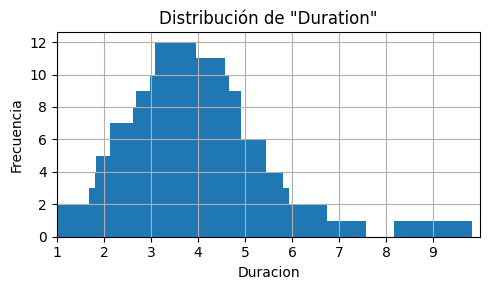

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# contamos las frecuencias de cada valor
duration_counts = dataset_covers_procesado['Duration'].value_counts()

# ordenamos las frecuencias por indece de menor a mayor
duration_counts = duration_counts.sort_index()

# graficamos el histograma
plt.figure(figsize=(5, 3))  # Ajusta el tamaño de la figura si es necesario
plt.bar(duration_counts.index, duration_counts.values)
# Configuramos los ticks del eje x para que vayan de 1 en 1
plt.xticks(np.arange(0, 10, 1))  # Establece los ticks de 1 a 10 con un paso de 1
plt.xlim(1, 10)  # Limita el eje x de 1 a 10
plt.xlabel('Duracion')
plt.ylabel('Frecuencia')
plt.title('Distribución de "Duration"')
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.grid()
plt.show() 

Representa la duración de la canción, medida en minutos y segundos. Las canciones de la muestra tienen una media de 3.83 minutos. El valor mínimo es de 0.51 minutos, mientras que el máximo es de 9.42 minutos. A partir del histograma, se puede observar un sesgo hacia la derecha, con una desviación estándar de 1.03.

Observaciones:
* La media y la mediana son bastante cercanas (3.83 y 4.01 minutos), lo cual indica que la distribución no está significativamente sesgada.
* La mínima duración (0.51 minutos) podría ser un dato interesante para analizar si existen outliers o datos erróneos, o si corresponde a canciones cortas intencionadamente.
* La mayoría de las canciones se concentran en una duración de entre 3 y 5 minutos, lo cual es típico en la industria musical.

Analisis del valor minimo

In [106]:
dataset_covers_procesado.loc[dataset_covers_procesado['Duration'] == 0.510000]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
613,Theme From Mission: Impossible,Adam Clayton and Larry Mullen,0.51,4,0.299,0.571,5,-8.949,0,0.0395,0.318,0.137,0.0452,0.764,89.642,55,1996


La buscamos en YouTube y concluimos que la canción sí existe y tiene esa duración. Por lo tanto, decidimos dejarla.

#### Time_Signature: la métrica musical de la canción, indica el número de pulsaciones por compás.

In [107]:
dataset_covers_procesado["Time_Signature"].value_counts()

Time_Signature
4    865
3     45
5      6
1      3
Name: count, dtype: int64

In [108]:
dataset_covers_procesado["Time_Signature"].describe()

count    919.000000
mean       3.947769
std        0.286769
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Time_Signature, dtype: float64

Esta variable es de tipo cuantitativa discreta y presenta los valores 1, 3, 4 y 5. La métrica más común es la de 4 pulsaciones, lo que sugiere que se puede considerar un patrón rítmico más popular entre las canciones de la muestra. En cambio, las otras métricas son bastante raras en comparación, lo que sugiere que hay menos experimentación con estos compases.

#### Danceability: una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.

In [109]:
dataset_covers_procesado["Danceability"].describe()

count    919.000000
mean       0.622967
std        0.154782
min        0.135000
25%        0.518500
50%        0.631000
75%        0.738000
max        0.979000
Name: Danceability, dtype: float64

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

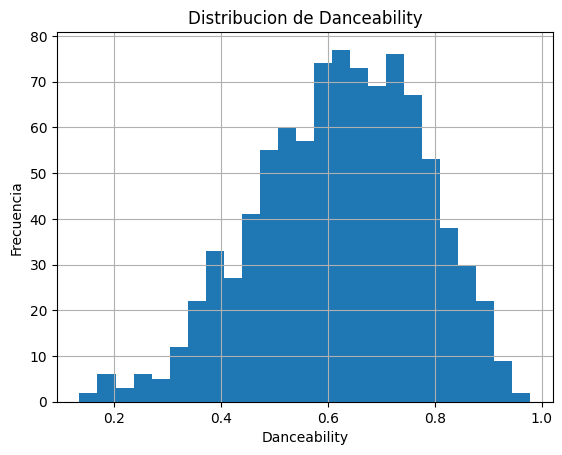

In [110]:
import matplotlib.pyplot as plt

bins=25

dataset_covers_procesado['Danceability'].hist(bins=bins)

plt.xlabel('Danceability')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Danceability')
plt.grid

Esta variable es de tipo cuantitativa continua. Podemos asumir que su rango va de 0 a 1, ya que su valor mínimo es 0.135 y el máximo es 0.979. La media es de 0.622967 y la mediana de 0.631, lo que indica que la mayoría de las canciones presentan un nivel medio de 'Danceability', podemos sugerir que esta característica es común en los géneros más populares.

En el histograma se observa una distribución aproximadamente normal, con un leve sesgo hacia la izquierda y una mayor concentración de frecuencias entre 0.50 y 0.7.

#### Energy: una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.

In [111]:
dataset_covers_procesado["Energy"].describe()

count    919.000000
mean       0.623548
std        0.203975
min        0.001340
25%        0.479500
50%        0.639000
75%        0.780000
max        0.999000
Name: Energy, dtype: float64

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

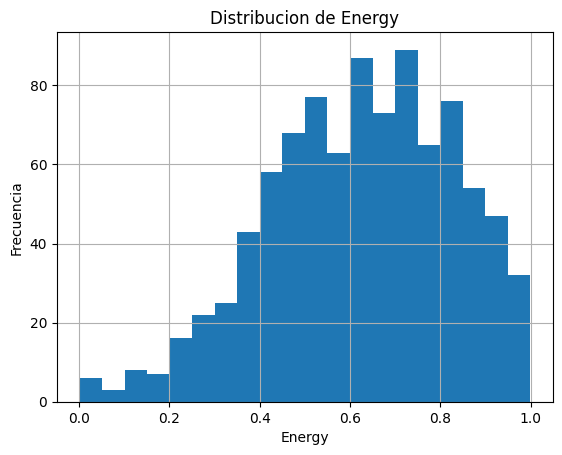

In [112]:
import matplotlib.pyplot as plt

bins=20

dataset_covers_procesado['Energy'].hist(bins=bins)

plt.xlabel('Energy')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Energy')
plt.grid

Es una variable cuantitativa continua con valores en un rango de 0 a 1. La muestra presenta una media de 0.623548 y una mediana de 0.639000, lo que indica que la distribución está centrada en valores medios a altos. Esto se refleja también en el histograma, que muestra un sesgo hacia la izquierda, con una mayor acumulación de frecuencias entre 0.6 y 0.8. Por esta razón, se puede asumir una tendencia hacia canciones con niveles moderados o altos de energía.

####  Key: la tonalidad musical en la que está compuesta la canción, representada por un número entero.

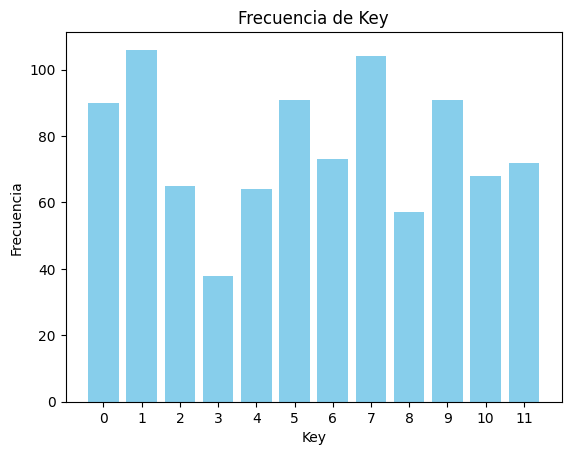

In [113]:
import matplotlib.pyplot as plt

# Obtener las frecuencias de Key ordenadas de mayor a menor
#key_frequencies = dataset_covers_procesado["Key"].value_counts().sort_values(ascending=False)
#Obtener las frecuencias de Key ordenadas Por Key
key_frequencies = dataset_covers_procesado["Key"].value_counts().sort_index()

# Crear el gráfico de barras con las tonalidades (claves) y las frecuencias
plt.bar(key_frequencies.index.astype(str), key_frequencies.values, color='skyblue')  # Convertir los índices a str para etiquetado

# Agregar etiquetas a los ejes
plt.xlabel("Key")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Frecuencia de Key")
plt.xticks(rotation=0)  # Mostrar las etiquetas sin rotar para mejor visualización

# Mostrar el gráfico
plt.show()

In [114]:
dataset_covers_procesado['Key'].describe()

count    919.000000
mean       5.412405
std        3.514783
min        0.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       11.000000
Name: Key, dtype: float64

La variable Key es cuantitativa discreta, ya que está representada por números enteros de 0 a 11, donde cada número corresponde a una nota musical específica dentro de una octava. En el análisis de frecuencias, se observó que la tonalidad más común es la 1, seguida de la tonalidad 7. Ambas tonalidades se encuentran por encima de las 100 canciones en la muestra, lo que sugiere una clara preferencia por estas tonalidades en la colección de canciones analizadas.

La media de la variable Key es de 5.41 y la mediana es de 6, lo que indica que la mayoría de las tonalidades de la muestra se encuentran en un rango intermedio. Sin embargo, al observar el gráfico de barras, se puede notar que la distribución no es uniforme, sino que presenta variaciones importantes en la frecuencia de cada tonalidad.

Especificamos que representa cada valor.

##### Tonalidades Mayores:

* 0: Do mayor (C) - sin sostenidos ni bemoles.
* 1: Sol mayor (G) - 1 sostenido.
* 2: Re mayor (D) - 2 sostenidos.
* 3: La mayor (A) - 3 sostenidos.
* 4: Mi mayor (E) - 4 sostenidos.
* 5: Si mayor (B) - 5 sostenidos.
* 6: Fa♯ mayor (F♯) - 6 sostenidos.
* 7: Do♯ mayor (C♯) - 7 sostenidos.
* 8: Fa mayor (F) - 1 bemol.
* 9: Si♭ mayor (B♭) - 2 bemoles.
* 10: Mi♭ mayor (E♭) - 3 bemoles.
* 11: La♭ mayor (A♭) - 4 bemoles.

##### Tonalidades Menores: Cada tonalidad menor tiene una tonalidad mayor relativa. Por ejemplo, la menor relativa de cada tonalidad podría estar en el mismo rango numérico:
* 0: La menor (A) - sin sostenidos ni bemoles.
* 1: Mi menor (E) - 1 sostenido.
* 2: Si menor (B) - 2 sostenidos.
* 3: Fa♯ menor (F♯) - 3 sostenidos.
* 4: Do♯ menor (C♯) - 4 sostenidos.
* 5: Sol♯ menor (G♯) - 5 sostenidos.
* 6: Re♯ menor (D♯) - 6 sostenidos.
* 7: Do menor (C) - 7 sostenidos.
* 8: Re menor (D) - 1 bemol.
* 9: La menor (A) - 2 bemoles.
* 10: Si♭ menor (B♭) - 3 bemoles.
* 11: Fa menor (F) - 4 bemoles.

#### Loudness: el volumen promedio de la canción, medido en decibelios (dB).

In [115]:
dataset_covers_procesado['Loudness'].describe()

count    919.000000
mean      -8.349071
std        3.892821
min      -42.950000
25%      -10.166500
50%       -7.599000
75%       -5.751000
max        0.919000
Name: Loudness, dtype: float64

Los valores mínimos de Loudness, especialmente los tan bajos como -42.95 dB, sugieren la presencia de outliers. Estos valores extremos podrían deberse a errores de medición o a características específicas de ciertas canciones.

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

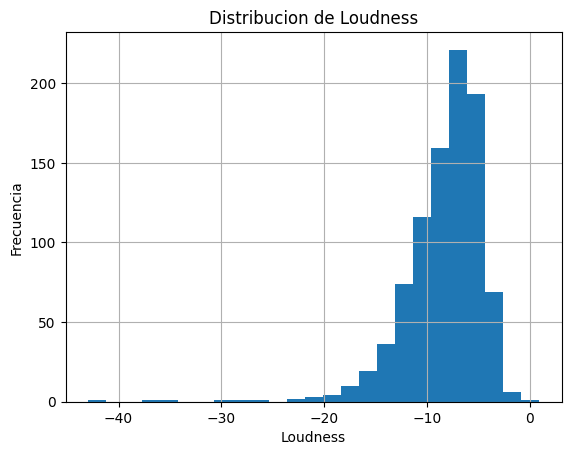

In [116]:
import matplotlib.pyplot as plt

bins=25

dataset_covers_procesado['Loudness'].hist(bins=bins)

plt.xlabel('Loudness')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Loudness')
plt.grid

La variable Loudness es cuantitativa continua y mide el volumen promedio de las canciones en decibelios (dB). En el conjunto de datos analizado, los niveles de volumen varían entre un mínimo de -42.95 dB y un máximo de 0.92 dB, con una media de -8.35 dB y una mediana de -7.60 dB. Esta proximidad entre la media y la mediana indica que la distribución está relativamente centrada en valores intermedios. La mayor parte de las canciones tiene un volumen dentro del rango de -5.75 dB a -10.17 dB, lo que sugiere una tendencia hacia volúmenes moderados en la muestra.

A partir del histograma, podemos notar un gran sesgo a izquierda, por lo tanto decidimos analisar en profundidar esta variable mediante un boxplot para identificar outliers.

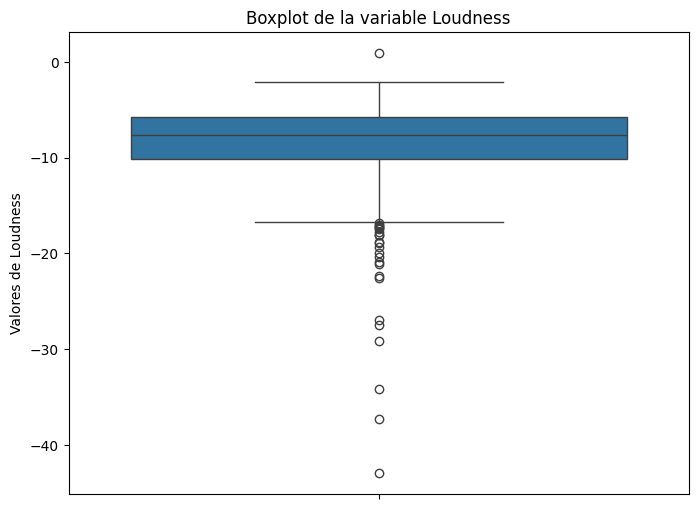

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y="Loudness", data=dataset_covers_procesado)

# Etiquetas y título
plt.ylabel("Valores de Loudness")
plt.title("Boxplot de la variable Loudness")

# Mostrar el gráfico
plt.show()



Para detectar si hay errores de modicion, nos preguntamos: ¿Entre que rangos estan los dB de una cancion?

* Canciones muy suaves: pueden estar alrededor de -30 dB a -20 dB. Esto podría incluir intros suaves o partes muy silenciosas de una canción.

* Canciones normales: La mayoría de las canciones suelen estar entre -12 dB y -6 dB. Este es el rango típico para la mayoría de los géneros musicales modernos.

* Canciones muy fuertes: pueden estar cerca de -3 dB a 0 dB. Estos niveles se encuentran en partes más intensas de canciones, como estribillos o momentos de clímax.

In [118]:
dataset_covers_procesado.loc[(dataset_covers_procesado['Loudness'] < -30) | (dataset_covers_procesado['Loudness'] > 0)]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
53,Release Me,Wilson Phillips,2.49,1,0.152,0.00504,0,-34.183,1,0.0432,0.9530,0.928,0.1020,0.0303,136.702,57,1990
241,Hazard,Richard Marx,2.37,4,0.609,0.95200,8,0.919,1,0.1690,0.0387,0.000,0.1820,0.5560,121.707,58,1992
323,Connected,Stereo MC’s,3.16,4,0.135,0.00134,2,-42.950,1,0.0496,0.9690,0.972,0.0884,0.0372,141.488,66,1993
762,Frozen,Madonna,2.41,4,0.179,0.00580,0,-37.260,1,0.0481,0.9240,0.929,0.1060,0.0314,72.177,67,1998


Considerando la información anterior, decidimos que los registros donde los valores son mayores a 0 dB o menores a -30 dB son outliers. Esto corresponde a 4 registros de la muestra, por lo que hemos decidido marcarlos como nulos.

In [119]:
import pandas as pd

dataset_covers_procesado['Loudness'] = dataset_covers_procesado['Loudness'].mask((dataset_covers_procesado['Loudness'] < -30) | (dataset_covers_procesado['Loudness'] > 0), pd.NA)
dataset_covers_procesado.loc[dataset_covers_procesado['Loudness'].isnull()]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
53,Release Me,Wilson Phillips,2.49,1,0.152,0.00504,0,NaN,1,0.0432,0.9530,0.928,0.1020,0.0303,136.702,57,1990
241,Hazard,Richard Marx,2.37,4,0.609,0.95200,8,NaN,1,0.1690,0.0387,0.000,0.1820,0.5560,121.707,58,1992
323,Connected,Stereo MC’s,3.16,4,0.135,0.00134,2,NaN,1,0.0496,0.9690,0.972,0.0884,0.0372,141.488,66,1993
762,Frozen,Madonna,2.41,4,0.179,0.00580,0,NaN,1,0.0481,0.9240,0.929,0.1060,0.0314,72.177,67,1998


In [120]:
dataset_covers_procesado['Loudness'].describe()

count    915.000000
mean      -8.261554
std        3.487718
min      -29.104000
25%      -10.113500
50%       -7.594000
75%       -5.751000
max       -2.053000
Name: Loudness, dtype: float64

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

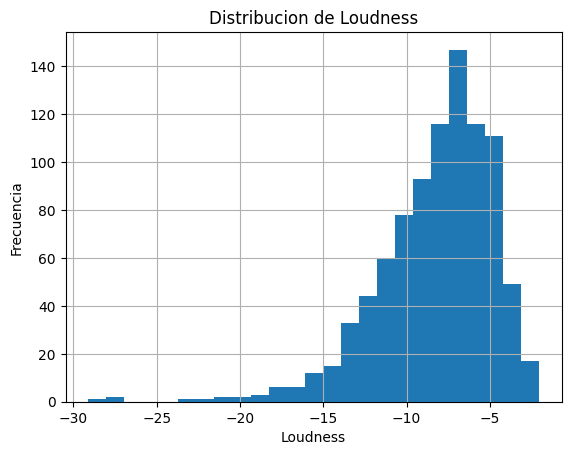

In [121]:
import matplotlib.pyplot as plt

bins=25

dataset_covers_procesado['Loudness'].hist(bins=bins)

plt.xlabel('Loudness')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Loudness')
plt.grid

En conclusión, las medidas estadísticas no tuvieron un gran impacto por la falta de estos valores, por lo tanto, el primer análisis sigue siendo válido, salvo por los valores mínimos y máximos.

#### Mode: la modalidad de la pista, indica si la canción está en tono mayor o menor.

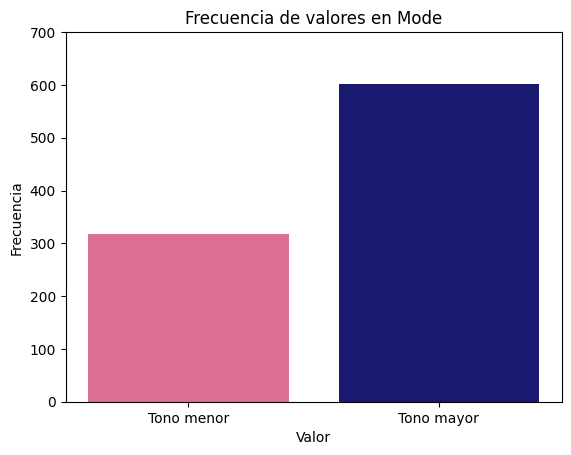

In [122]:
import matplotlib.pyplot as plt

frecuencias = dataset_covers_procesado["Mode"].value_counts().sort_index();

plt.bar(frecuencias.index, frecuencias.values, color=['#DB7093', 'midnightblue'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores en Mode')
plt.xticks([0, 1], ['Tono menor', 'Tono mayor'])  # Etiquetas para el eje x
plt.ylim(0,700);
plt.show()

Para el analisis de esta variable asumiremos que el valor 1 representa un tono mayor y el valor 0 un tono menor. En el grafico de barras se puede observar con claridad que las canciones en tono mayor son casi el doble de las canciones con tono menor.

#### Speechiness: una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.

In [123]:
dataset_covers_procesado['Speechiness'].describe()

count    919.000000
mean       0.075793
std        0.079570
min        0.023000
25%        0.032400
50%        0.042900
75%        0.075600
max        0.529000
Name: Speechiness, dtype: float64

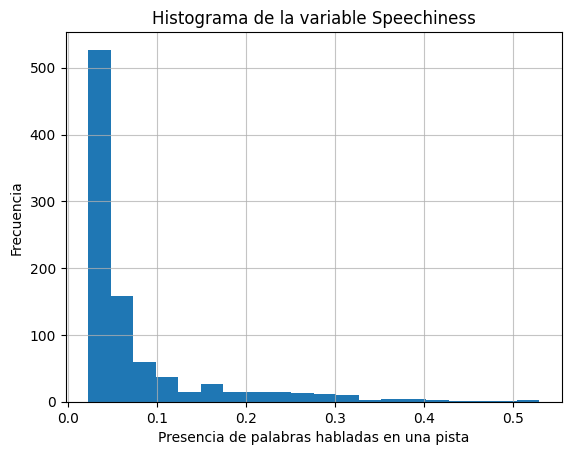

In [124]:
bins = 20
plt.hist(dataset_covers_procesado["Speechiness"], bins=bins);
plt.xlabel('Presencia de palabras habladas en una pista')
plt.ylabel('Frecuencia')
plt.title("Histograma de la variable Speechiness")
plt.grid(axis='both', alpha=0.75)
plt.show()

El boxplot refleja gran cantidad de outliers, lo cual insinuaba el histograma anterior. Pero de acuerdo al significado de la variable no tendria sentido eliminarlos porque representan que muy pocas canciones del dataset tienen grandes partes habladas y las muestras estan dominadas por canciones con letra sin hablar.

#### Acousticness: una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.

In [125]:
dataset_covers_procesado['Acousticness'].describe()

count    919.000000
mean       0.230068
std        0.256284
min        0.000004
25%        0.029700
50%        0.120000
75%        0.344500
max        0.995000
Name: Acousticness, dtype: float64

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

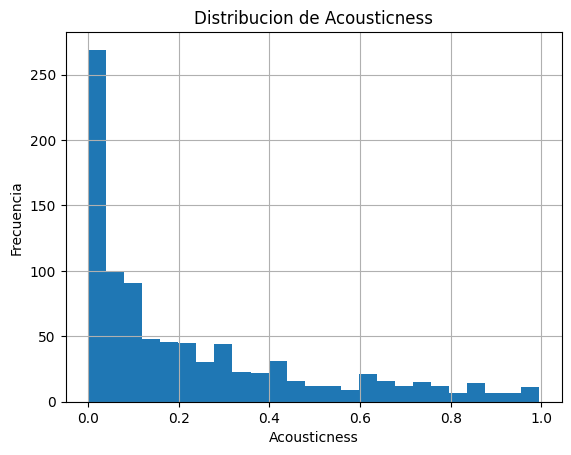

In [126]:
import matplotlib.pyplot as plt

bins=25

dataset_covers_procesado['Acousticness'].hist(bins=bins)

plt.xlabel('Acousticness')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Acousticness')
plt.grid

La variable 'Acousticness' es de tipo cuantitativo continuo, y se mide en un rango de valores entre 0 y 1. A medida que el valor de 'Acousticness' aumenta, también aumenta la probabilidad de que una canción sea acústica.

En esta muestra, la media de 'Acousticness' es de 0.230, lo que indica que, en promedio, las canciones tienen una baja probabilidad de ser acústicas.

Al observar el histograma de la variable, notamos un notable sesgo hacia la derecha. Esto sugiere que en la muestra no predominan las canciones acústicas, y que la mayoría de las pistas presentan valores bajos en términos de calidad acústica.

#### Instrumentalness: una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

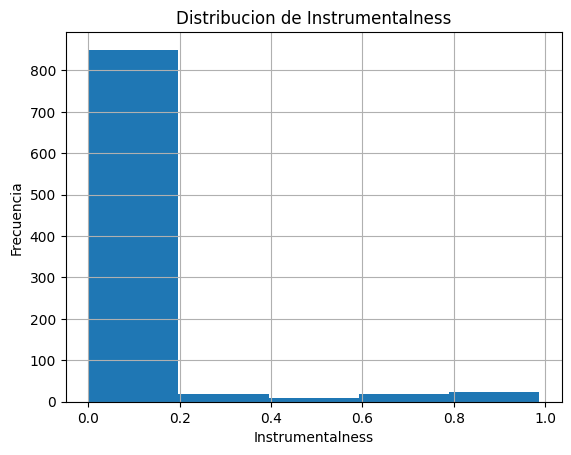

In [127]:
import matplotlib.pyplot as plt

bins=5

dataset_covers_procesado['Instrumentalness'].hist(bins=bins)

plt.xlabel('Instrumentalness')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Instrumentalness')
plt.grid

In [128]:
dataset_covers_procesado['Instrumentalness'].describe()

count    919.000000
mean       0.052947
std        0.180214
min        0.000000
25%        0.000000
50%        0.000006
75%        0.000741
max        0.987000
Name: Instrumentalness, dtype: float64

La variable 'Instrumentalness' es de tipo cuantitativo continuo y se mide en un rango de 0 a 1. Esta variable presenta una media de 0.052947 y una mediana de 0.000006, lo que sugiere un posible sesgo en la distribución. Este sesgo se confirma al observar el histograma, donde se aprecia una alta frecuencia de valores cercanos a 0, mientras que los valores medios o cercanos a 1 son muy poco frecuentes. Esto indica que la mayoría de las canciones de la muestra tienen una baja presencia instrumental y, por lo tanto, es probable que contengan voces.

Además, el 25% de las canciones tienen un valor de 'Instrumentalness' igual a 0. Sin embargo, existen algunas canciones con valores más altos que podrían considerarse atípicos o outliers. Surge entonces la pregunta de si estos valores deben tratarse como outliers, aunque se encuentren dentro del rango de medición esperado (0 a 1).

Para resolver esta duda, se propone identificar y analizar la canción con el valor máximo de 'Instrumentalness' y reproducirla, con el fin de verificar si efectivamente se trata de una pista puramente instrumental y confirmar la precisión de los datos.

In [129]:
# Encontrar el valor máximo de la columna 'Instrumentalness'
valor_maximo = dataset_covers_procesado['Instrumentalness'].max()

# Filtrar las filas donde 'Instrumentalness' sea igual al valor máximo
filas_maximas = dataset_covers_procesado.loc[dataset_covers_procesado['Instrumentalness'] == valor_maximo]

# Mostrar las filas con el valor máximo de 'Instrumentalness'
filas_maximas


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
295,Rain,Madonna,2.11,5,0.231,0.976,10,-27.426,0,0.0487,0.152,0.987,0.48,0.00672,96.552,81,1993


Luego de escuchar la canción, consideramos que la medición es correcta, ya que hay una única sección sin presencia de voces, pero esta dura apenas unos pocos segundos (aproximadamente 5 o 6 segundos). Por lo tanto, el valor alto de 'Instrumentalness' parece reflejar de manera precisa la estructura de la canción.

#### Liveness: una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.

In [130]:
dataset_covers_procesado["Liveness"].describe()

count    919.000000
mean       0.171865
std        0.138296
min        0.025000
25%        0.089200
50%        0.118000
75%        0.217500
max        0.965000
Name: Liveness, dtype: float64

Observando los estadisticos de resumen, se puede observar que el 25% superior de las muestras se distribuye entre 0.2175 y 0.965 mientras que el restante 75% se distribuye en un rango menor, entre 0.025 y 0.2175. Esto ya insinua la presencia de un sesgo a derecha. A continuacion vamos a mostrar un diagrama para estudiar la presencia de picos y otros comportamientos posibles en la distribucion de los datos

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

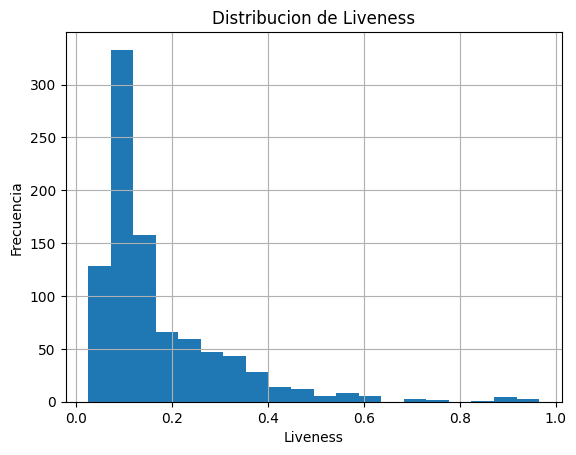

In [131]:
import matplotlib.pyplot as plt

bins=20

dataset_covers_procesado['Liveness'].hist(bins=bins)

plt.xlabel('Liveness')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Liveness')
plt.grid

Se aprecia claramente un pico en 0.1 aproximadamente. Podemos concluir que la mayoria de las pistas tienen muy baja probabilidad de haber sido interpretadas en vivo. Tambien se evidencia que la frecuencia de la pistas con probabilidades altas de haber sido tocadas en vivo va en decremento. Ahora ¿hay motivos para considerar que las pistas con valores entre 0.7 y 1 sean outliers?

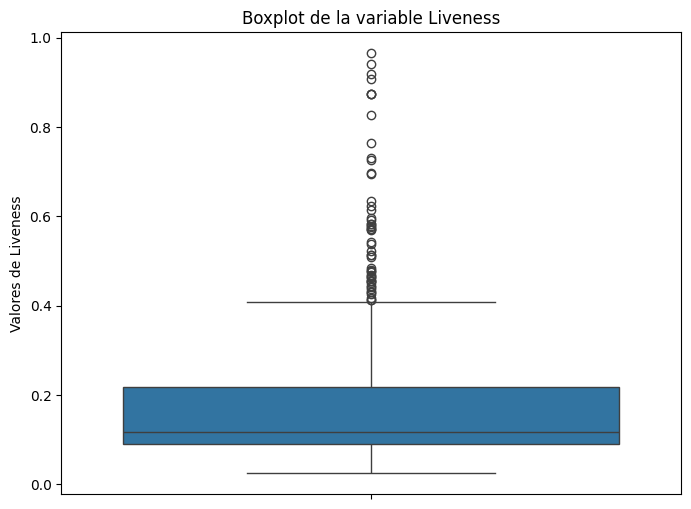

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y="Liveness", data=dataset_covers_procesado)

# Etiquetas y título
plt.ylabel("Valores de Liveness")
plt.title("Boxplot de la variable Liveness")

# Mostrar el gráfico
plt.show()

Si bien el boxplot refleja los valores de 0.4 en adelante como outliers, no tiene sentido considerarlos de esa manera porque representan el significado de la variable. Es aceptable que pocas muestras hayan podido ser interpretadas en vivo.

#### Valence: Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.

In [133]:
dataset_covers_procesado["Valence"].describe()

count    919.000000
mean       0.531424
std        0.246091
min        0.006720
25%        0.341500
50%        0.535000
75%        0.728500
max        0.975000
Name: Valence, dtype: float64

Es una variable de tipo float con media en 0.531424 y mediana en 0.535, lo cual indica que es aproximadamente simetrica. Ademas, por lo que se observa en los valores de los cuartiles parece que no hay ningun sesgo significativo en la distribucion de los datos ya que el valor central inferior (25%), el valor central (50%) y el valor central superior (75%) tienen distancias parecidas. Vamos a verlo en detalle a partir de un histograma.

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

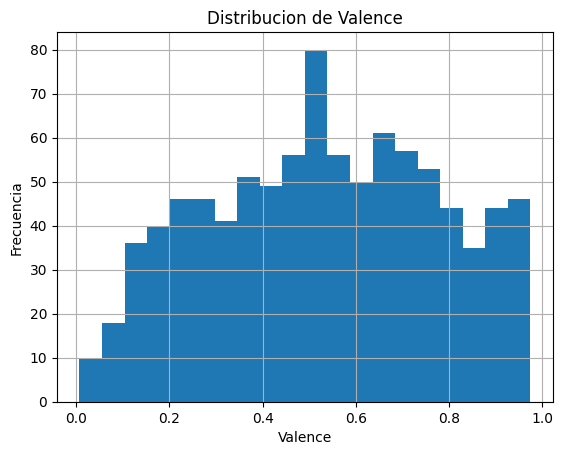

In [134]:
import matplotlib.pyplot as plt

bins=20

dataset_covers_procesado['Valence'].hist(bins=bins)

plt.xlabel('Valence')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Valence')
plt.grid

Si bien hay un pico en 0.5, lo cual indica que un numero mayor de canciones no son ni muy positivas ni muy negativas, se puede concluir que hay variedad de canciones, mas o menos alegres.
A continuacion veamos que tan asimetricos o simetricos son los datos y la centralidad de los mismos.

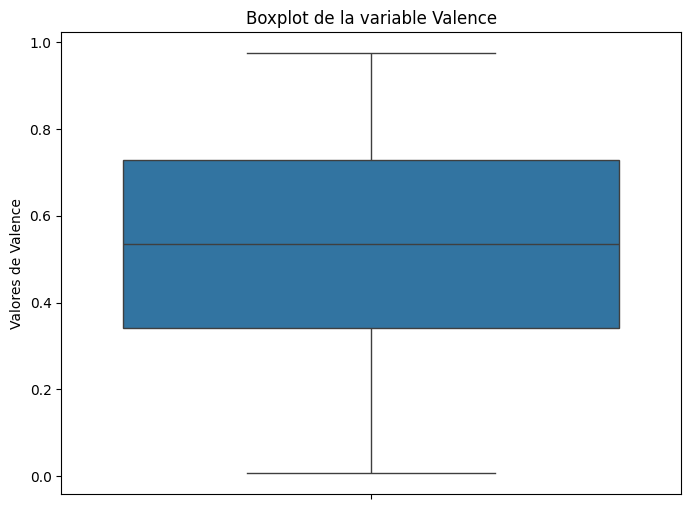

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y="Valence", data=dataset_covers_procesado)

# Etiquetas y título
plt.ylabel("Valores de Valence")
plt.title("Boxplot de la variable Valence")

# Mostrar el gráfico
plt.show()

A partir del boxplot se puede asegurar que es una variable bastante centrada. El 50% central de los datos se encuentran entre 0.35 y 0.75 aprox mientras que los 25% de los extremos tienen poca diferencia de longitud.

#### Tempo: la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).

In [136]:
dataset_covers_procesado["Tempo"].describe()

count    919.000000
mean     118.711789
std       29.684070
min       48.718000
25%       96.924000
50%      115.010000
75%      133.424000
max      219.973000
Name: Tempo, dtype: float64

A partir del metodo discribe sobre la columna Tempo del dataset se pueden ver las medidas estadisticas de resumen. A partir de la similitud de la media (mean) y la mediana (50%) podemos suponer que la distribucion de los datos es simetrica. Sin embargo podemos observar una gran distancia entre el valor central superior (75%) y el maximo indicando que el 25% superior de las muestras se encuentran mas dispersas. Para Ver en mas detalle como se comportan los datos de la variable Tempo visulizaremos un grafico:

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

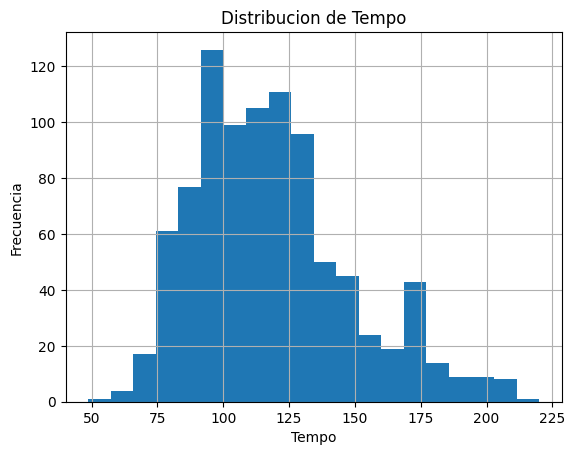

In [137]:
import matplotlib.pyplot as plt

bins=20

dataset_covers_procesado['Tempo'].hist(bins=bins)

plt.xlabel('Tempo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Tempo')
plt.grid


Ahora podemos refutar la suposicion anterior, ya que la distribucion muestra un leve sesgo a derecha con la mayoria de los valores concentrados entre 75 y 150, es decir que es asimetrica. ¿Esto significa que los valores por debajo de 75 o por encima de 150 son incorrectos? No, el tempo indica cuantas pulsaciones hay por minuto lo cual varia de acuerdo al genero musical y en una misma pista Por ello podemos encontrar canciones con Tempo desde 20 BPM hasta arriba de los 300 BPM. Por otro lado hay ciertos aspectos que podemos considerar: el Tempo da indicios del genero musical al que pertenece la cancion y el dato de cada muestra es un promedio de los diferentes tempos en la pista.

#### Popularity: una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

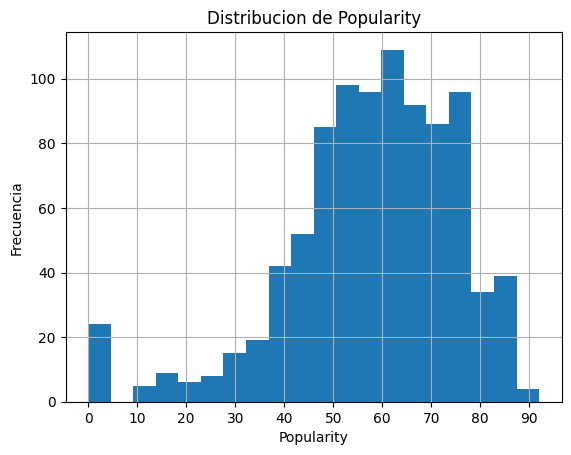

In [138]:
import matplotlib.pyplot as plt

bins=20

dataset_covers_procesado['Popularity'].hist(bins=bins)

plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Popularity')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Popularity')
plt.grid

In [139]:
dataset_covers_procesado['Popularity'].describe()

count    919.000000
mean      57.722524
std       17.599522
min        0.000000
25%       49.000000
50%       60.000000
75%       70.000000
max       92.000000
Name: Popularity, dtype: float64


La variable 'Popularity' es cuantitativa discreta y se puede asumir que tiene un rango de 0 a 100. Presenta una media de 57.72, lo que sugiere que, en promedio, las canciones de la muestra tienen una popularidad moderada. Sin embargo, la desviación estándar de 17.6 indica una dispersión considerable alrededor de la media, reflejando una variedad en los niveles de popularidad de las canciones.

Para representar gráficamente la distribución, inicialmente intentamos usar un gráfico de barras, dado que la variable es discreta. Sin embargo, este tipo de gráfico no permitía visualizar claramente la distribución de los datos, por lo que optamos por agrupar los valores en intervalos para elaborar un histograma. Este histograma muestra una distribución sesgada hacia la izquierda, con la mayoría de las canciones agrupadas entre 50 y 80 en popularidad.

También se observa una frecuencia de aproximadamente 25 en valores cercanos a 0, lo cual podría indicar canciones con muy baja popularidad, o bien, pistas nuevas en el catálogo que aún no han ganado reconocimiento o suficientes reproducciones.

#### Year: el año en que se lanzó la canción.

In [140]:
dataset_covers_procesado['Year'].describe()

count     919.000000
mean     1994.405876
std         2.926405
min      1990.000000
25%      1992.000000
50%      1994.000000
75%      1997.000000
max      1999.000000
Name: Year, dtype: float64

In [141]:
dataset_covers_procesado['Year'].value_counts()

Year
1991    100
1990     99
1999     96
1992     95
1993     94
1994     91
1998     91
1997     89
1995     86
1996     78
Name: count, dtype: int64

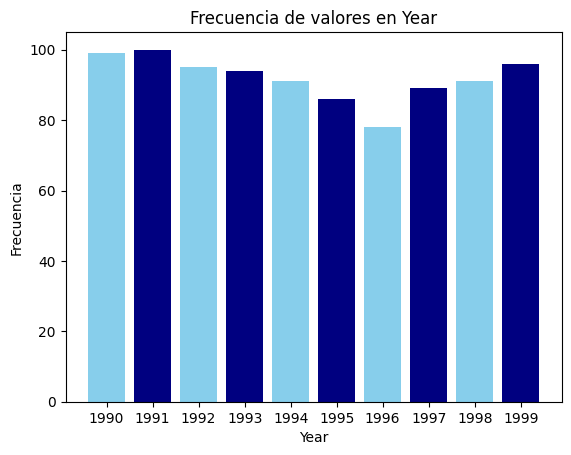

In [142]:
import matplotlib.pyplot as plt

frecuencias = dataset_covers_procesado["Year"].value_counts().sort_index();

plt.bar(frecuencias.index, frecuencias.values, color=['skyblue', '#000080'])
plt.xlabel('Year')
plt.xticks(frecuencias.index)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores en Year')
plt.show()

La variable es cuantitativa discreta y representa el año de lanzamiento de cada canción. La muestra abarca canciones de la década de los 90s (1990 a 1999), con una media de 1994.41, lo que sugiere que la mayoría de las canciones están concentradas en la primera mitad de la década.

En términos de frecuencia, los años 1991 y 1990 presentan la mayor cantidad de lanzamientos, con 100 y 99 canciones, respectivamente. Por otro lado, 1996 tiene la menor cantidad, con un total de 78 canciones. El gráfico de barras confirma que 1990, 1991 y 1999 tienen las frecuencias más altas, mientras que 1996 es el año con menos canciones en la muestra. Esta distribución podría deberse a tendencias específicas en la industria musical o a una inclinación de la muestra hacia ciertos años.

Sabiendo que todas las conclusiones se limitarán a esta década, podemos explorar cuáles fueron los géneros más populares y analizar sus características particulares en esta época.

### Analisis bivariado.

El análisis bivariado vamos a analizar la relación entre dos variables para identificar patrones y posibles correlaciones. Bbusca entender cómo interactúan dos variables entre sí, proporcionando información valiosa sobre tendencias y dependencias. Este tipo de análisis es útil para descubrir si existe una relación lineal, para construir modelos predictivos y realizar análisis multivariados más avanzados.

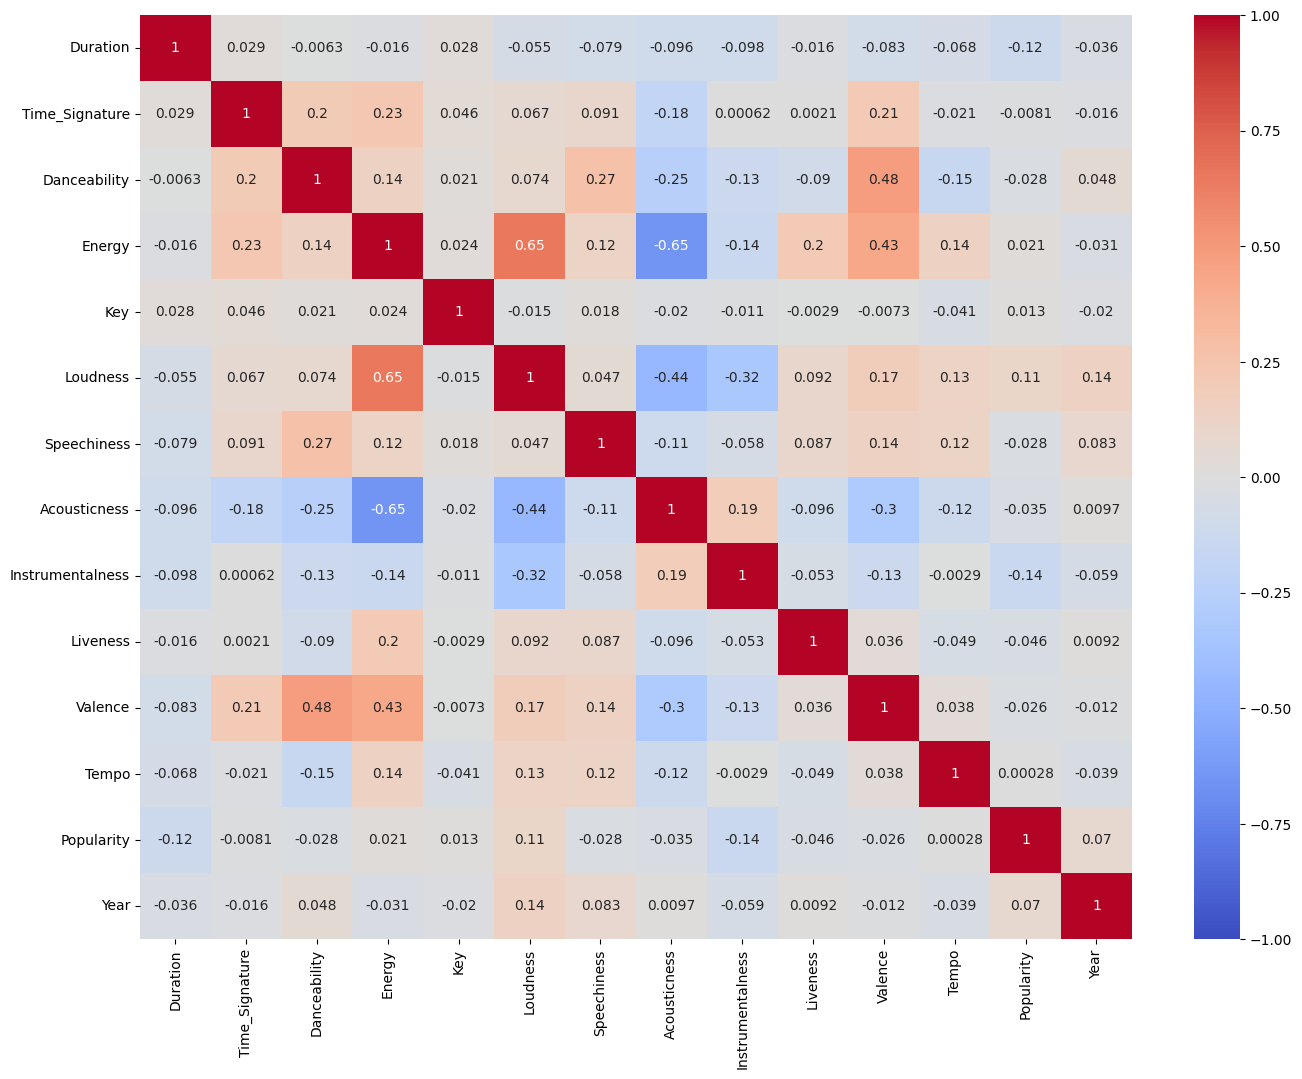

In [143]:
import seaborn as sns
import numpy as np

dataset_covers_procesado_bivariado = dataset_covers_procesado.copy()
dataset_covers_procesado_bivariado = dataset_covers_procesado_bivariado.drop(columns=["Track", "Artist", "Mode"])

correlation_matrix = dataset_covers_procesado_bivariado.corr()

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Este mapa de calor muestra las correlaciones lineales entre diferentes variables del conjunto de datos, donde los valores de correlación se representan mediante una escala de colores que va de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta). Las relaciones más destacadas incluyen una fuerte correlación positiva entre Energy y Loudness (0.65), lo cual sugiere que las canciones más enérgicas tienden a ser más ruidosas. También se observa una correlación negativa entre Acousticness y Energy (-0.65), indicando que las canciones acústicas suelen tener menor energía. Sin embargo, en general, la mayoría de las variables presentan correlaciones bajas, lo que sugiere que no existen relaciones lineales fuertes entre ellas. Esto puede indicar que muchas de las variables del dataset ofrecen información independiente, útil para un análisis más detallado o un modelo predictivo.

Algunas variables, como Artist, Track y Mode, quedaron excluidas del heatmap debido a que no son cuantitativas. Esto significa que no pueden ser representadas en una matriz de correlación estándar, ya que esta técnica se centra en la relación entre variables numéricas.

Podemos observar que ninguna correlacion es demasiado cercana a 1 o -1. Al no superar el 0.7 o -0.7 no podemos asegurar que haya relaciones lineales entre las variables. Sin embargo el color mas calido con un coeficiente de correlacion de 0.65 se da entre Loudness y Energy. Esto sugiere que, aunque no hay una relación lineal perfecta, sí hay una tendencia positiva: a medida que aumenta el volumen de una pista, también tiende a aumentar su energía.

#### Analisis de la correlacion Energy y Loudness

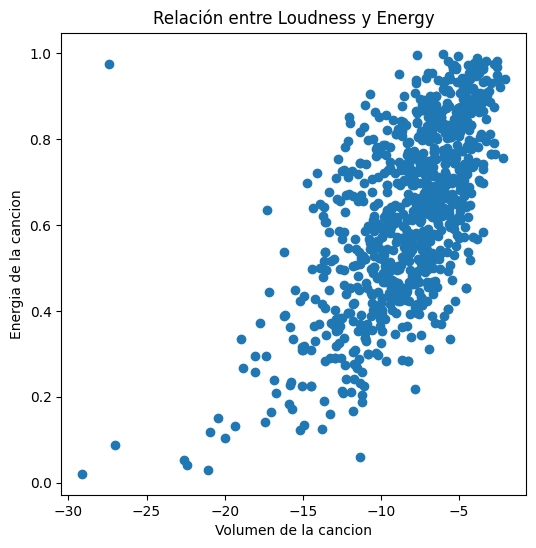

In [144]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(dataset_covers_procesado["Loudness"], dataset_covers_procesado["Energy"])

# Agregar etiquetas a los ejes
plt.xlabel("Volumen de la cancion")
plt.ylabel("Energia de la cancion")

# Agregar un título al gráfico
plt.title("Relación entre Loudness y Energy")

# Mostrar el gráfico
plt.show()

La relación entre Loudness y Energy no parece ser lineal y que, de hecho, podría tener un comportamiento exponencial o al menos curvilíneo. Esto se observa en la forma ascendente y curva de los puntos en el gráfico de dispersión.

A continuacion veremos si la relacion entre las variables varia segun sean de tono mayor o menor

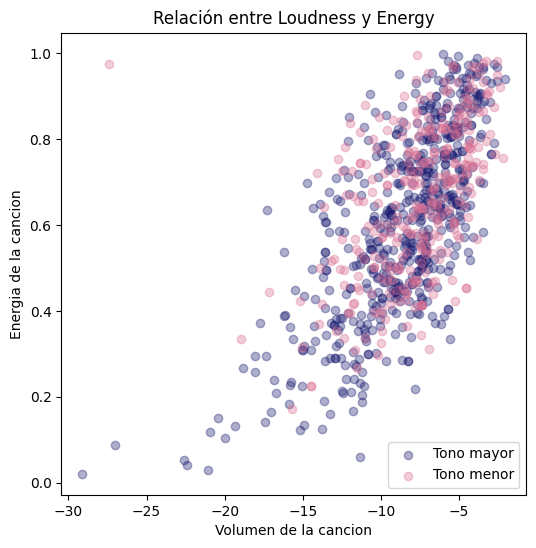

In [145]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

mode_1 = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 1]
mode_0 = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 0]


plt.scatter(mode_1["Loudness"], mode_1["Energy"], color = 'midnightblue', alpha=0.35, label="Tono mayor")
plt.scatter(mode_0["Loudness"], mode_0["Energy"], color = 'palevioletred', alpha=0.35, label="Tono menor")

# Agregar etiquetas a los ejes
plt.xlabel("Volumen de la cancion")
plt.ylabel("Energia de la cancion")

# Agregar un título al gráfico
plt.title("Relación entre Loudness y Energy")

plt.legend()

# Mostrar el gráfico
plt.show()

Observando el gráfico de dispersión y diferenciando entre tonos mayor y menor, se puede notar una ligera diferencia en la relación entre Loudness y Energy. Las canciones en tono mayor tienden a tener un volumen más bajo (valores más negativos de Loudness) cuando la energía de la canción es menor. Sin embargo, esta diferencia es leve, ya que en ambos tonos se observa un comportamiento similar: a medida que aumenta el volumen de la canción, también lo hace la energía.

#### Analisis de la correlacion Energy y Accousticness

En el mapa de calor esta variables tienen una correlacion lineal de -0.65. Al ser negativa significa que mientras una variable crece, la otra va a decrecer, para probar este vamos a realizar un scatterplot.

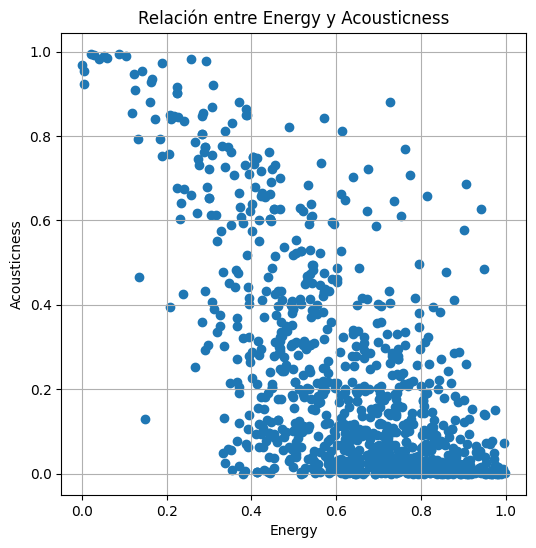

In [146]:
import matplotlib.pyplot as plt

variable_1 = "Energy"
variable_2 = "Acousticness"

# creamos el scatter plot
plt.figure(figsize=(6, 6))  # con esta línea podemos ajustar el tamaño de la gráfica
plt.scatter(dataset_covers_procesado[variable_1], dataset_covers_procesado[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

# Mostrar el gráfico
plt.grid(True)
plt.show()

En el scatterplot se observa una tendencia decreciente entre la acústica y la energía de las canciones. Las muestras con un valor de acústica cercano a 1 suelen presentar una energía próxima a 0, mientras que cuando la energía es cercana a 1, la acústica tiende hacia 0. Sin embargo, no se puede afirmar con certeza que exista una correlación lineal, ya que las muestras están muy dispersas alrededor de la tendencia general.

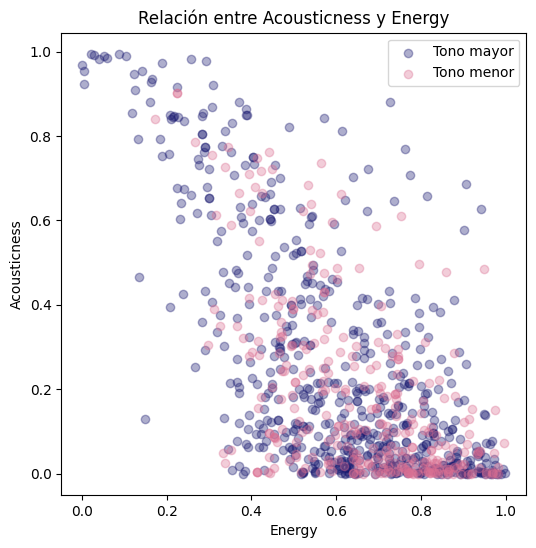

In [147]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

mode_1 = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 1]
mode_0 = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 0]


plt.scatter(mode_1["Energy"], mode_1["Acousticness"], color = 'midnightblue', alpha=0.35, label="Tono mayor")
plt.scatter(mode_0["Energy"], mode_0["Acousticness"],  color = 'palevioletred', alpha=0.35, label="Tono menor")

# Agregar etiquetas a los ejes
plt.ylabel("Acousticness")
plt.xlabel("Energy")

# Agregar un título al gráfico
plt.title("Relación entre Acousticness y Energy")

plt.legend()

# Mostrar el gráfico
plt.show()

Hay una tendencia que mientras mas cerca a 1 es la energia el tono es menor, pero no da informacion significativaya que la muestras estan dispersas independientemente del tono

#### Analisis de la relacion de la variable Modo con otras

A continuación, nos enfocaremos en la variable Mode y exploraremos cómo se relaciona con otras variables de interés en el dataset. La variable Mode es dicotómica, indicando si una pista está en tono mayor (1) o menor (0).

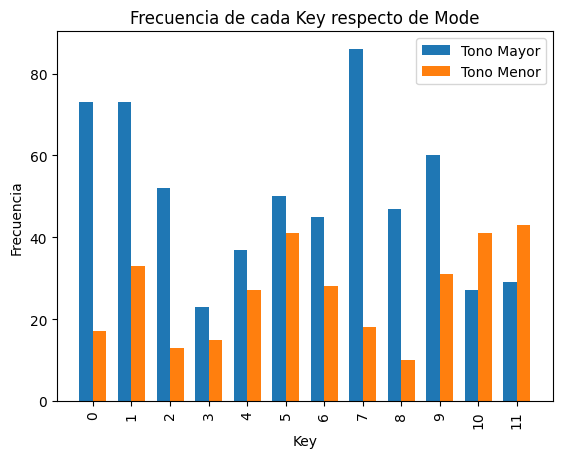

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar y contar frecuencias para cada Key en cada Mode
frecuencia_tono_mayor = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 1]["Key"].value_counts().sort_index()
frecuencia_tono_menor = dataset_covers_procesado[dataset_covers_procesado["Mode"] == 0]["Key"].value_counts().sort_index()

# Convertir las Series a DataFrames y renombrar las columnas
frecuencia_tono_mayor = frecuencia_tono_mayor.rename("Frecuencia_TonoMayor").reset_index()
frecuencia_tono_mayor.columns = ["Key", "Frecuencia_TonoMayor"]

frecuencia_tono_menor = frecuencia_tono_menor.rename("Frecuencia_TonoMenor").reset_index()
frecuencia_tono_menor.columns = ["Key", "Frecuencia_TonoMenor"]

# Combinar ambos DataFrames en uno solo
merged_data = pd.merge(frecuencia_tono_mayor, frecuencia_tono_menor, on="Key", how="outer")
merged_data = merged_data.sort_values(by="Key")

# Configurar el gráfico
x = merged_data["Key"]
width = 0.35

# Crear las barras para cada Tono (mayor y menor)
plt.bar([i - width/2 for i in range(len(x))], merged_data["Frecuencia_TonoMayor"], width, label='Tono Mayor')
plt.bar([i + width/2 for i in range(len(x))], merged_data["Frecuencia_TonoMenor"], width, label='Tono Menor')

# Agregar etiquetas y leyenda
plt.xlabel("Key")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de cada Key respecto de Mode")
plt.xticks(range(len(x)), merged_data["Key"], rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()

En el análisis univariado de la variable Key, se explicó que las tonalidades pueden ser mayores o menores. En el gráfico de barras se observa una predominancia de pistas en tonalidad mayor en la mayoría de las Keys, desde 0 hasta 9, mientras que las tonalidades menores tienen una presencia reducida, superando al tono mayor solo en las Keys 10 y 11. Además, se destaca una gran diferencia entre los tonos mayor y menor en las tonalidades como la 0, 1 y 7, mientras que en tonalidades como la 3, 5 y 10, la diferencia de frecuencias es menos marcada.

Estas observaciones podrían sugerir una mayor presencia de pistas alegres o positivas, donde los tonos mayores son más comunes, en contraste con una menor cantidad de canciones melancólicas o tristes, donde suelen predominar los tonos menores. También podría indicar una tendencia a realizar covers de canciones más animadas o de carácter positivo.

Asimismo el Mode puede influir en aspectos como la energía, la valencia y el tempo de la canción. Examinar su relación con estas variables podría proporcionar informacion sobre cómo la tonalidad impacta en las características musicales y emocionales de las pistas. Comenzaremos con Energy.

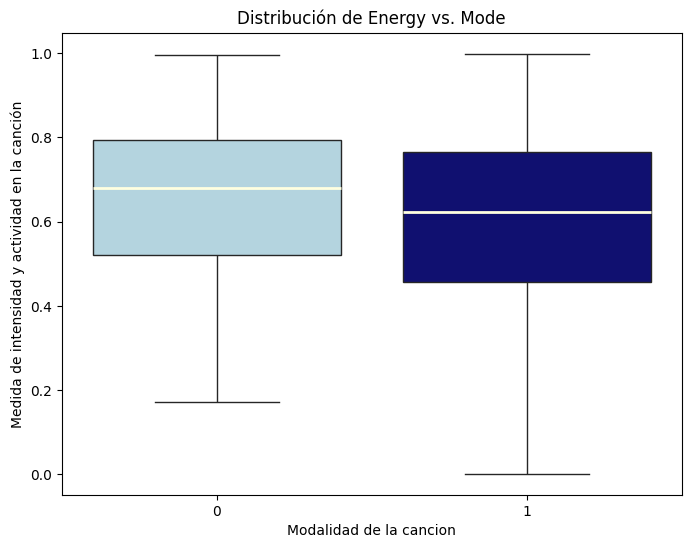

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))
colores = {0: "lightblue", 1: "navy"}
sns.boxplot(x="Mode", y="Energy", data=dataset_covers_procesado, hue="Mode", palette=colores, legend=False,
            medianprops={"color": "lightyellow", "linewidth": 2})

# Agregar etiquetas a los ejes
plt.xlabel("Modalidad de la cancion")
plt.ylabel("Medida de intensidad y actividad en la canción")

# Agregar un título al gráfico
plt.title("Distribución de Energy vs. Mode")

# Mostrar el gráfico
plt.show()

Debido a la similitud entre las distribuciones podemos concluir que el tono en el que se encunetra la cancion no guarda relacion con la energia de la misma. Aunque la mediana de energía para el modo menor es ligeramente más alta que la del modo mayor (0.7 aprox contra 0.6), ambos modos tienen rangos similares, lo que indica que los niveles de energía no parecen depender mucho del modo.


Ambos modos muestran una variabilidad en energía similar, como lo indican las longitudes de las cajas y los bigotes.


Continuemos analizando la variable Valence para comprobar la afirmación de que las canciones en tono mayor son más alegres, mientras que las canciones en tono menor son más tristes.

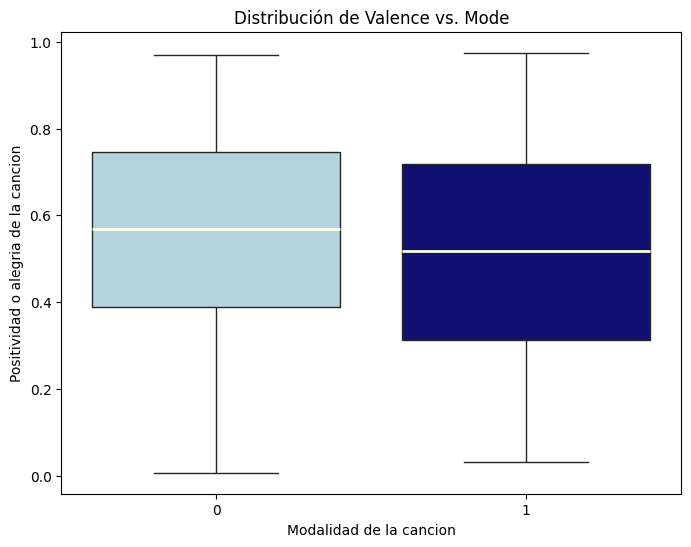

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))

colores = {0: "lightblue", 1: "navy"}

sns.boxplot(x="Mode", y="Valence", data=dataset_covers_procesado, hue="Mode", palette=colores, legend=False,
            medianprops={"color": "lightyellow", "linewidth": 2})

# Agregar etiquetas a los ejes
plt.xlabel("Modalidad de la cancion")
plt.ylabel("Positividad o alegria de la cancion")

# Agregar un título al gráfico
plt.title("Distribución de Valence vs. Mode")

# Mostrar el gráfico
plt.show()

El gráfico sugiere que las canciones en modo menor tienen una mediana de valencia ligeramente superior a las de modo mayor. Sin embargo, no se observa una diferencia clara en los niveles de positividad entre ambos modos, ya que ambos muestran una gran variabilidad en los valores de valencia. De hecho, contrario a lo esperado, las pistas en tono mayor presentan valores de positividad más bajos. Esto, ademas de refutar lo anterior, podría indicar que nuestras suposiciones sobre la codificación de modo (mayor como 1 y menor como 0) podrían ser incorrectas, aunque no tenemos forma de confirmarlo con la información disponible.
La siguiente variable a considerar es Tempo. ¿Influye el tono de la cancion en el tiempo?

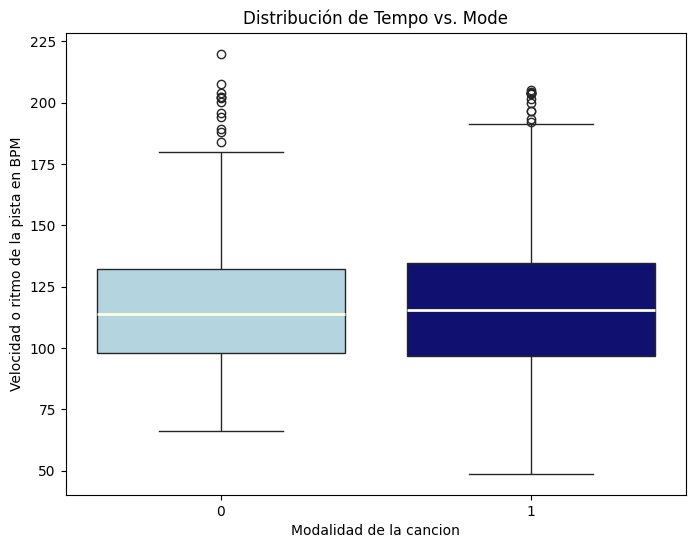

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))

colores = {0: "lightblue", 1: "navy"}

sns.boxplot(x="Mode", y="Tempo", data=dataset_covers_procesado, hue="Mode", palette=colores, legend=False,
            medianprops={"color": "lightyellow", "linewidth": 2})

# Agregar etiquetas a los ejes
plt.xlabel("Modalidad de la cancion")
plt.ylabel("Velocidad o ritmo de la pista en BPM")

# Agregar un título al gráfico
plt.title("Distribución de Tempo vs. Mode")

# Mostrar el gráfico
plt.show()

A partir del boxplot pordemos decir que no se observa una diferencia significativa en las medianas del tempo entre canciones en modo menor y mayor, ambas rondan los 115 BPM. Asimismo la variabilidad del tempo y la presenciaa de valores atipicos tambien son similares en ambos modos, lo que sugiere que el tempo no esta directamente relacionado con el modo de la cancion.

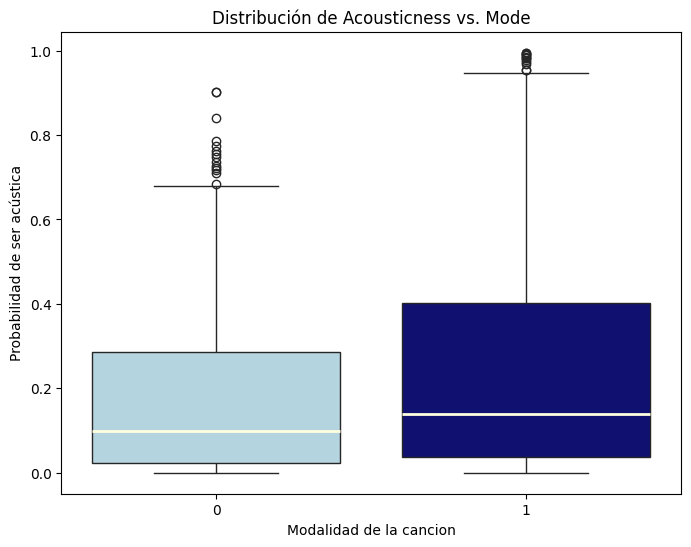

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))

colores = {0: "lightblue", 1: "navy"}

sns.boxplot(x="Mode", y="Acousticness", data=dataset_covers_procesado, hue="Mode", palette=colores, legend=False,
            medianprops={"color": "lightyellow", "linewidth": 2})

# Agregar etiquetas a los ejes
plt.xlabel("Modalidad de la cancion")
plt.ylabel("Probabilidad de ser acústica")

# Agregar un título al gráfico
plt.title("Distribución de Acousticness vs. Mode")

# Mostrar el gráfico
plt.show()

Las canciones en modalidad 1 (tono mayor) muestran una probabilidad ligeramente mayor de ser acústicas en comparación con las de modalidad 0 (tono menor). Sin embargo, ambos grupos presentan una alta variabilidad en esta probabilidad, junto con valores atípicos que destacan canciones con características mucho más acústicas que la mayoría en cada modalidad.

Podriamos plantear que las cancione en tono mayor suelen ser mas acuesticas que las canciones en tono menor.

### Hipotesis 1: La popularidad se relaciona con el resto de las caracteristicas

La primera hipótesis plantea que la popularidad de una canción es un aspecto fundamental que podría estar influenciado por múltiples características musicales. Dado que la popularidad refleja el nivel de aceptación y preferencia del público, es relevante explorar cómo otras propiedades de la canción, como el ritmo, el volumen, la energía o la tonalidad, pueden estar relacionadas con este indicador. Esta investigación permitirá entender qué atributos contribuyen a hacer una canción más atractiva y popular.

A continuacion se generó un nuevo dataset a partir del conjunto de datos original, excluyendo las variables categóricas Track y List, la variable dicotómica Mode y la variable Year, esta última considerada irrelevante para nuestro análisis actual. Esta selección de variables permite centrar el estudio en aquellas características numéricas y continuas que pueden contribuir al análisis de la popularidad de las canciones, sin incluir variables categóricas o temporales que no añaden valor en el estudio de esta hipotesis.

In [153]:
# Crear un nuevo DataFrame solo con las columnas seleccionadas
dataset_procesado_h1 = dataset_covers_procesado.copy()
dataset_procesado_h1 = dataset_procesado_h1.dropna()
dataset_procesado_h1_numeric = dataset_procesado_h1.drop(['Mode', 'Track', 'Artist', 'Year','Popularity'], axis=1)


In [154]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
dataset_procesado_h1_scaled = scaler.fit_transform(dataset_procesado_h1_numeric)

print(np.std(dataset_procesado_h1_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


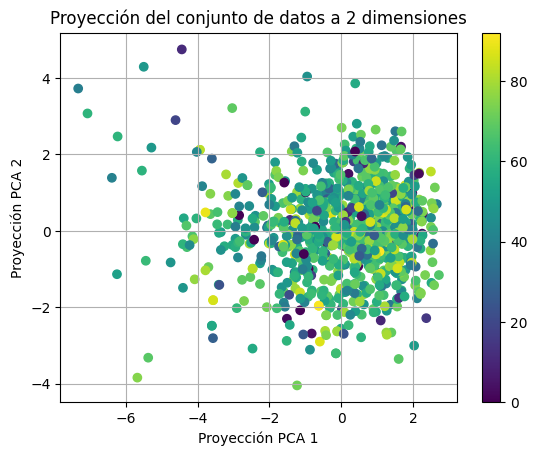

In [155]:
# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
# normalice esas features (whiten=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset_procesado_h1_scaled)

# graficamos los datos. el color de cada punto representa el valor de la casa
plt.scatter(X_pca[:,0], X_pca[:,1], c=dataset_procesado_h1["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

No se ve que ocurra algo en nuestro conjunto de datos, ya que las muestras de popularidad mas alta o mas baja ocurren en diversos lugares del espacio proyectado. Si hubiera una clara separación de colores, podríamos inferir que la popularidad está relacionada con las componentes principales. Sin embargo, aquí la distribución parece bastante dispersa. La popularidad, representada en colores, parece distribuida aleatoriamente, lo cual sugiere que las características elegidas no explican completamente la popularidad en esta proyección de dos dimensiones.
No obstante, PCA permite visualizar relaciones lineales entre las variables, no va a poder captar patrones no lineales complejos que puedan estar presentes en los datos. Entonces podemos explorar relaciones no lineales con t-SNE y verificar si podemos encontrar algo.

#### t-SNE

Before t-SNE: (915, 12)
After t-SNE: (915, 2)


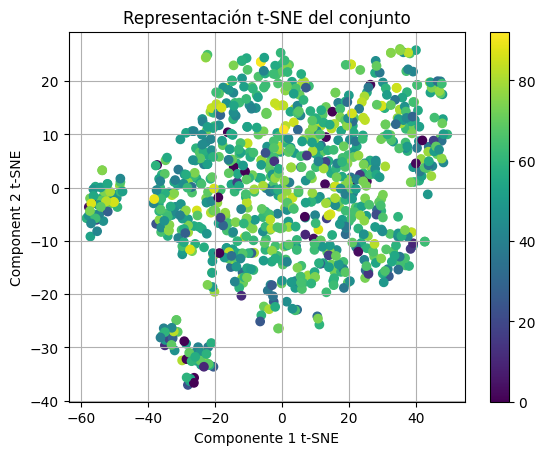

In [156]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(dataset_procesado_h1_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(dataset_procesado_h1_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=dataset_procesado_h1["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Ahora la distribucion parece presentar algunas caracteristicas diferenciadas. Se observan dos pequeños grupos a la izquierda y otro mucho mas grande a la derecha. Veamos que sucede si usamos UMAP, una alternativa mejorada de t-SNE para relaciones no lineales.

#### UMAP

Antes de UMAP: (915, 12)
Después de UMAP: (915, 2)


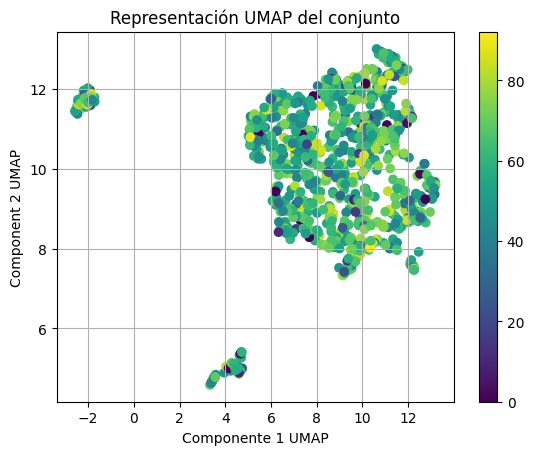

In [157]:
# importamos umap
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_umap = umap.UMAP(n_components=2).fit_transform(dataset_procesado_h1_scaled)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(dataset_procesado_h1_scaled.shape))
print('Después de UMAP: {}'.format(X_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_umap[:,0], X_umap[:,1], c=dataset_procesado_h1["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

Ahora se ven grupos mas diferenciados pero los colores están mezclados, por lo que puede ser una indicación de que la popularidad no se asocia fuertemente con las variables utilizadas en el análisis, es decir que la popularidad no está directamente relacionada con una única combinación de características. Por lo tanto **la hipotesis se rechaza**.

A diferencia del gráfico de t-SNE, aquí parece haber un grupo denso en el centro, con algunos grupos más dispersos en los bordes (por ejemplo, en la parte superior izquierda y en la parte inferior). Las agrupaciones más compactas sugieren que hay subconjuntos de datos que comparten características similares. Los puntos más alejados, como el grupo en la esquina superior izquierda, podrían representar observaciones atípicas o casos que tienen características significativamente diferentes del resto del conjunto.

Sería interesante investigar qué características específicas comparten los puntos en esos grupos. Para ello utilizaremos clustering.

In [158]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset_covers_procesado_cluster = dataset_procesado_h1_numeric.copy()
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = dataset_procesado_h1_numeric.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
dataset_covers_procesado_cluster[numeric_cols] = scaler.fit_transform(dataset_procesado_h1_numeric[numeric_cols])

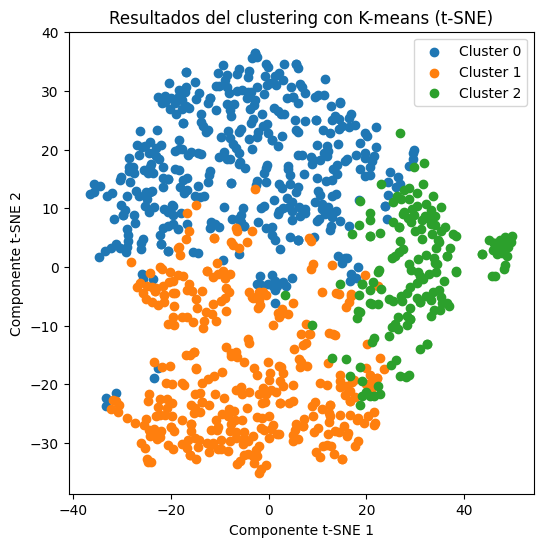

In [159]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# separamos las features de los nombres de los países
canciones = dataset_procesado_h1['Track'] + '-' + dataset_procesado_h1['Artist']
features = dataset_covers_procesado_cluster

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=3, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features)

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Cancion': canciones})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(6, 6))
for cluster_num in range(3):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

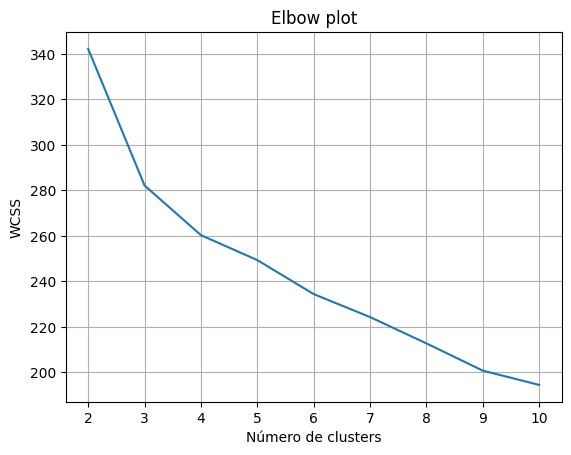

In [160]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
#Crear columna con numero de cluster
dataset_covers_cluster = features.copy()
kmeans = KMeans(n_clusters=3, verbose=0, random_state=10)
dataset_covers_cluster['Cluster'] = kmeans.fit_predict(features)

# Agrupar por el número de cluster y calcular la media para cada característica
cluster_summary = dataset_covers_cluster.groupby('Cluster')

# Resumen de caracteristicas por cluster
dataset_covers_cluster.groupby('Cluster').mean()

,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Cluster,,,,,,,,,,,,
0,0.374150,0.743125,0.571761,0.666277,0.765455,0.789787,0.117311,0.138615,0.037504,0.159733,0.574170,0.421056
1,0.373210,0.745726,0.596797,0.690574,0.197099,0.806409,0.117665,0.136315,0.037857,0.167252,0.616927,0.421592
2,0.370364,0.707317,0.450591,0.344313,0.462860,0.646533,0.044070,0.648173,0.110631,0.125506,0.311839,0.351130


Cluster 0 muestra un nivel medio de baile (danceability de 0.57) y una energía moderada (0.67), con un volumen alto (loudness de 0.79). Tiene un bajo componente acústico (acousticness de 0.14), indicando una mayor inclinación hacia música electrónica o amplificada, y un valence de 0.57, que refleja un estado emocional positivo. El tempo promedio es de 0.42, lo cual sugiere una velocidad moderada.

Cluster 1 es ligeramente más bailable que el Cluster 0, con una danceability de 0.60, y muestra una energía moderada-alta (0.69). El loudness es alto (0.81), similar al Cluster 0, y también presenta una baja acústica (acousticness de 0.14), indicando una fuerte presencia de elementos electrónicos. La valencia es de 0.62, lo que sugiere un tono emocional positivo, y el tempo es de 0.42, similar al Cluster 0.

Cluster 2, en cambio, tiene una menor danceability (0.45) y una energía significativamente más baja (0.34), lo que sugiere una música más calmada. Su loudness es de 0.65, mostrando un volumen moderado, y tiene un alto componente acústico (acousticness de 0.65), lo cual indica una mayor inclinación hacia la música acústica o no amplificada. Su valence es de 0.31, sugiriendo un tono emocional más neutro o negativo, y su tempo es de 0.35, ligeramente más bajo que los otros clusters.

Cabe destacar que la mayor diferencia entre los clusters se encuentra en la variable Key por lo que seria interesante estudiar si la divicion de las canciones se debe a la tonalidad de las canciones.

### Hipotesis 2: Los grupos de canciones presentan diferencias significativas en la tonalidad predominante de sus composiciones.

Para comenzar, seleccionamos un subconjunto del dataset que nos interesa estudiar y agregamos una columna que contiene el número de cluster al que pertenece cada muestra.

In [162]:
dataset_covers_procesado_h2 = dataset_procesado_h1_numeric
dataset_covers_procesado_h2['Cluster'] = clusters_kmeans

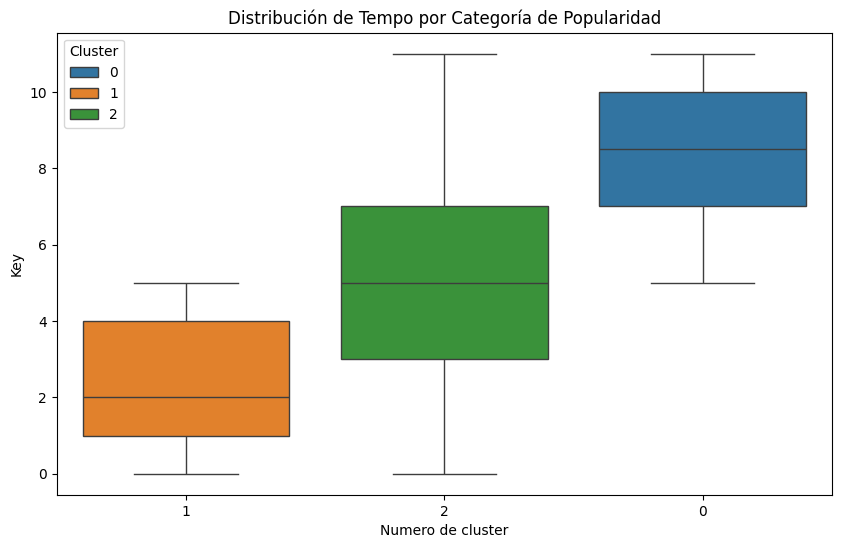

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot de Tempo por cada categoría de Popularity
plt.figure(figsize=(10, 6))

# Definir los colores en formato lista (no conjunto)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# Obtener el orden de las categorías de 'Popularity_Category' y luego invertirlo
categories_order = dataset_covers_procesado_h2['Cluster'].unique()
categories_order = categories_order[::-1]

# Crear el boxplot, asignando 'Popularity_Category' a hue para la coloración
sns.boxplot(data=dataset_covers_procesado_h2, x='Cluster', y='Key', hue='Cluster', palette=colors, order=categories_order)

# Personalizar el gráfico
plt.xlabel('Numero de cluster')
plt.ylabel('Key')
plt.title('Distribución de Tempo por Categoría de Popularidad')
plt.show()

El gráfico muestra la distribución de la tonalidad (Key) en función del número de cluster definidos a partir de las caracteristica de las canciones. Podemos observar lo siguiente:

* Cluster 1 tiene una menor variabilidad en la tonalidad y se centra en valores bajos de Key, indicando que este grupo de canciones tiende a utilizar tonalidades más graves o específicas en un rango reducido.

* Cluster 2 presenta una mayor variabilidad en la tonalidad, con un rango amplio de valores de Key. Esto sugiere que este grupo incluye canciones con una variedad de tonalidades más amplia en comparación con los otros clusters.

* Cluster 0 muestra una distribución intermedia en términos de Key, con una tendencia a tonalidades más altas que Cluster 1, pero con menos variabilidad que Cluster 2.

En conjunto, esto sugiere que los clusters presentan diferencias en la tonalidad de las canciones, lo que podría indicar que cada grupo agrupa canciones con ciertas características tonales particulares. Pero esto no es suficiente, vamos a aplicar un test. Para eso primero analisamos los supuestos.

##### Normalidad

Para identificar que test podemos usar el primer paso es testear la normalidad de los datos. Para ello utilizaremos Shapiro Wilks.

In [164]:
from scipy.stats import shapiro

# Separamos los datos en cuatro grupos: no popular, poco popular, popular y muy popular
canciones_tonalidad_baja = dataset_covers_procesado_h2[dataset_covers_procesado_h2['Cluster'] == 1]['Key']
canciones_tonalidad_media = dataset_covers_procesado_h2[dataset_covers_procesado_h2['Cluster'] == 2]['Key']
canciones_tonalidad_alta = dataset_covers_procesado_h2[dataset_covers_procesado_h2['Cluster'] == 0]['Key']

# Test de Shapiro-Wilk para canciones no populares
stat, p = shapiro(canciones_tonalidad_baja)
print(f"Test de Shapiro-Wilk para canciones no populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones no populares
stat, p = shapiro(canciones_tonalidad_media)
print(f"Test de Shapiro-Wilk para canciones mas o menos populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones muy populares
stat, p = shapiro(canciones_tonalidad_alta)
print(f"Test de Shapiro-Wilk para canciones muy populares: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones no populares: Estadístico=0.866, p-valor=0.000
Test de Shapiro-Wilk para canciones mas o menos populares: Estadístico=0.956, p-valor=0.000
Test de Shapiro-Wilk para canciones muy populares: Estadístico=0.915, p-valor=0.000


Recordemos que en el test de Shapiro-Wilk, la hipótesis nula es la normalidad de los datos. En consecuencia, si el p-valor que obtenemos es menor a nuestro nivel de confianza  α  (normalmente  α=0.05 ), estamos entonces ante datos que no respetan una distribución normal. Entonces podemos concluir que nuestros datos no son normales.

¿Y qué nos dice, por ejemplo, un QQ plot, que es una herramienta también ampliamente difundida para estudiar normalidad? 

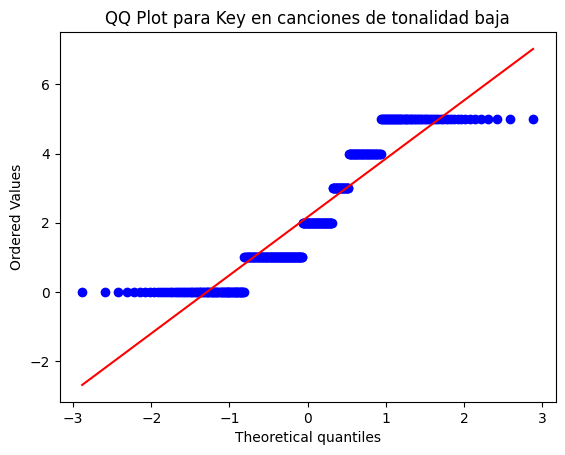

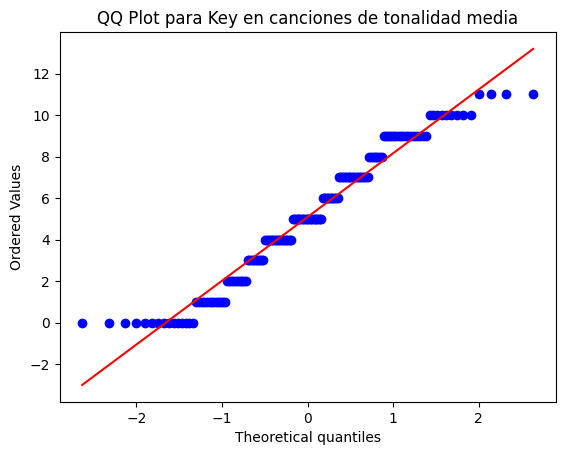

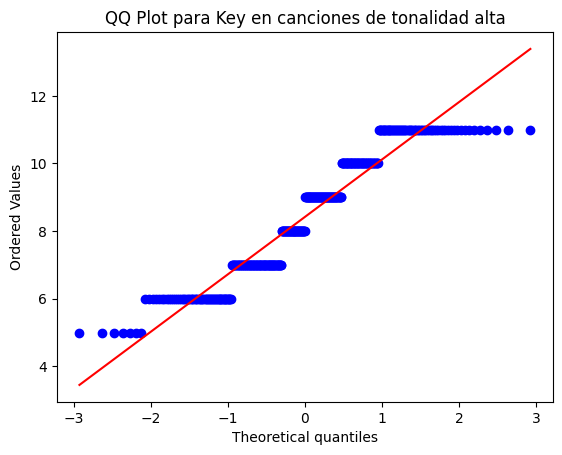

In [165]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para países desarrollados
stats.probplot(canciones_tonalidad_baja, dist="norm", plot=plt)
plt.title("QQ Plot para Key en canciones de tonalidad baja")
plt.show()

# QQ plot para canciones mas o menos populares
stats.probplot(canciones_tonalidad_media, dist="norm", plot=plt)
plt.title("QQ Plot para Key en canciones de tonalidad media")
plt.show()

# QQ plot para canciones muy populares
stats.probplot(canciones_tonalidad_alta, dist="norm", plot=plt)
plt.title("QQ Plot para Key en canciones de tonalidad alta")
plt.show()

La línea diagonal representa la distribución teórica perfecta, y si los puntos siguen esta línea, los datos se ajustan bien a la distribución normal. En conclusión, ni los dos tests ni el QQ-plot nos están mostrando normalidad en los datos, así que no podemos usar el test T.

##### Homocedasticidad

La homocedasticidad, o igualdad de varianzas, es un supuesto fundamental en varios tests estadísticos. Esto significa que la variabilidad de los datos dentro de cada grupo debe ser aproximadamente similar. Para evaluar si nuestras muestras cumplen con este supuesto, contamos con dos pruebas: el test de Levene, que es más robusto para distribuciones no normales, y el test de Bartlett, que funciona mejor en distribuciones normales. Dado que nuestros datos no siguen una distribución normal, aplicaremos el test de Levene para comprobar la homocedasticidad.

Es importante recordar que en el test de Levene, la hipótesis nula establece que las varianzas son iguales (homocedásticas). Por lo tanto, esperamos obtener un p-valor mayor a 0.05, lo que indicaría que no hay diferencias significativas entre las varianzas y, por ende, se cumple el supuesto de homocedasticidad.

In [166]:
stat, p = stats.levene(canciones_tonalidad_baja, canciones_tonalidad_media, canciones_tonalidad_alta)
print(f"Test de Levene para Key: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Key: Estadístico=57.743, p-valor=0.000


El p-valor dio 0, por debajo de 0.05. Esto significa que los datos no son homocedasticos. 

#### Test de Kruskal Wallis

Dado que nuestro conjunto no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos, vamos a tener que recurrir al test de Kruskal-Wallis. La hipótesis nula del test es que no existen diferencias significativas entre los dos grupos provistos. Por consiguiente, si el p-valor del test nos da por debajo del umbral de significancia (acá abajo les puse una variable alpha en 0.05 para controlar eso), efectivamente hay una diferencia significativa entre ambos.

In [167]:
# Test de Kruskal-Wallis 
stat, p = stats.kruskal(canciones_tonalidad_baja, canciones_tonalidad_media, canciones_tonalidad_alta)
print(f"Test de Krukal Wallis para Key: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la Key entre canciones de tonalidad alta, media y baja")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la Key entre canciones de tonalidad alta, media y baja")

Test de Krukal Wallis para Key: Estadístico=597.125, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la Key entre canciones de tonalidad alta, media y baja


El p-valor obtenido es muy pequeño (menor a 0.001), lo que indica que existen diferencias significativas en los valores de tonalidad (Key) de las canciones comparadas. Esto confirma que **la hipótesis es aceptada.**

### Hipotesis 3: Las canciones mas populares estan en tono mayor.

En los analisis anteriores excluimos la variable dicotomica Mode. A continuacion realizamos un analisis bivariado de Mode y Popularity para comprender si existe alguna relacion entre ellas.

In [168]:
dataset_covers_procesado_h3 = dataset_covers_procesado[["Mode","Popularity"]].copy()

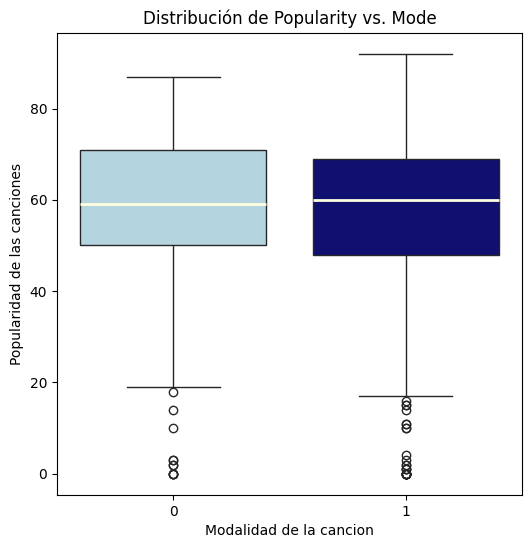

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 6))
colores = {0: "lightblue", 1: "navy"}
sns.boxplot(x="Mode", y="Popularity", data=dataset_covers_procesado_h3, hue="Mode", palette=colores, legend=False,
            medianprops={"color": "lightyellow", "linewidth": 2})

# Agregar etiquetas a los ejes
plt.xlabel("Modalidad de la cancion")
plt.ylabel("Popularidad de las canciones")

# Agregar un título al gráfico
plt.title("Distribución de Popularity vs. Mode")

# Mostrar el gráfico
plt.show()

El boxplot muestra la distribución de la popularidad de las canciones según su modalidad, donde 0 representa el tono menor y 1 el tono mayor. A primera vista, ambas modalidades muestran un rango de popularidad amplio, entre aproximadamente 20 y 80, lo que indica una diversidad en los niveles de aceptación independientemente del modo musical.

La mediana de popularidad es ligeramente superior para las canciones en tono mayor (valor 1), lo cual respalda parcialmente la hipótesis de que el tono mayor se asocia con una mayor popularidad. Aunque las canciones en tono mayor presentan una caja más baja en el gráfico (lo que indica una concentración de popularidad en valores intermedios), su amplitud es mayor que la del tono menor, reflejando una mayor variabilidad en la popularidad de estas canciones.

Además, ambos modos muestran valores atípicos en los niveles más bajos de popularidad, lo que sugiere que algunas canciones no alcanzan altos niveles de aceptación, independientemente de su modo. Sin embargo, la mayor amplitud en la distribución de las canciones en tono mayor sugiere que este modo podría ser más versátil o atractivo para el público en algunos casos, a pesar de no haber una diferencia drástica en la mediana.

En resumen, la interpretación del gráfico no proporciona un respaldo sólido a la hipótesis de que el tono mayor está asociado con una mayor popularidad. La similitud en los rangos y medianas indica que, en este dataset, la modalidad de la canción (mayor o menor) no parece ser un factor determinante de popularidad. 

Para rechazar o aceptar la hipotesis y dar una respuesta concreta, vamos a utilizar un test. Para esto primero debemos validar los supuestos: normalidad y homocedasticidad de varianzas.

#### Normalidad
Al aplicate el test de normalidad de Shapiro-Wilk, la hipótesis nula es la normalidad de los datos. En consecuencia, si el p-valor que obtenemos es menor a nuestro nivel de confianza  α  (normalmente  α=0.05 ), estamos entonces ante datos que no respetan una distribución normal.

In [170]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
tonos_mayor = dataset_covers_procesado_h3[dataset_covers_procesado_h3['Mode'] == 1]['Popularity']
tonos_menor = dataset_covers_procesado_h3[dataset_covers_procesado_h3['Mode'] == 0]['Popularity']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(tonos_mayor)
print(f"Test de Shapiro-Wilk para canciones de tono mayor: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(tonos_menor)
print(f"Test de Shapiro-Wilk para canciones de tono menor: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones de tono mayor: Estadístico=0.938, p-valor=0.000
Test de Shapiro-Wilk para canciones de tono menor: Estadístico=0.938, p-valor=0.000


Al realizar el test podemos ver que los dos p-valor son de 0, por lo tanto estan debajo de nuestro nivel de cofianza (0.05). Queire decir que los datos no siguen una distribucion normal. PEro veamoslo graficamente en un QQ Plot

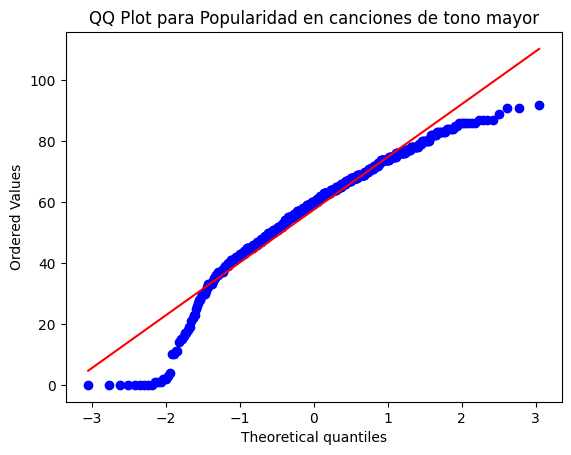

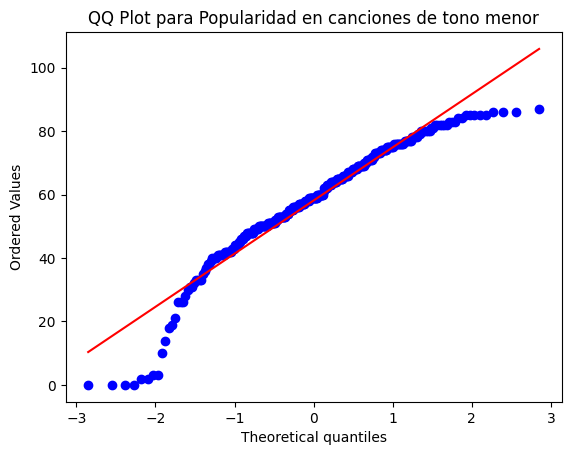

In [171]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para países desarrollados
stats.probplot(tonos_mayor, dist="norm", plot=plt)
plt.title("QQ Plot para Popularidad en canciones de tono mayor")
plt.show()

# QQ plot para países en vías de desarrollo
stats.probplot(tonos_menor, dist="norm", plot=plt)
plt.title("QQ Plot para Popularidad en canciones de tono menor")
plt.show()


#### Homocedasticidad

Vamos a aplicar el test de Levene, donde la hipótesis nula es que las varianzas son significativamente diferentes entre sí (hay heterocedasticidad), por lo que pedimos que el test nos de un p-valor mayor a 0.05.

In [172]:
stat, p = stats.levene(tonos_mayor, tonos_menor)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=0.239, p-valor=0.625


El test nos devolvio un p-valor de 0.625 por lo tanto los datos son homocedasticos.

#### Mann Whitney U

Como nuestro conjunto ahora no cumple normalidad pero sí homocedasticidad, podemos recurrir al test de Mann Whitney U para evaluar la significancia estadística de las diferencias entre ambos grupos.  La hipótesis nula del test es que no existen diferencias significativas entre los dos grupos provistos. Por consiguiente, si el p-valor del test nos da por debajo del umbral de significancia, efectivamente hay una diferencia significativa entre ambos.

In [173]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(tonos_mayor, tonos_menor)
print(f"Test de Mann-Whitney U para Popularidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la popularidad entre canciones de tono mayor o tono menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre canciones de tono mayor o tono menor.")

Test de Mann-Whitney U para Popularidad: Estadístico=94226.000, p-valor=0.756
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la popularidad entre canciones de tono mayor o tono menor.


El test nos dio un p-valor bastante alto (0.756), lo que nos está indicando que efectivamente las diferencias no son significativas. Por consiguiente, no podemos asegurar que las diferencias en la popularidad de las canciones entre tono mayor y tono menor sean estadísticamente significativas. Entonces **se rechaza la hipotesis**

### Hipotesis 4: Energy se puede predecir a partir de Loudness y Acousticness

Para analizar la posibilidad de predecir la variable Energy en canciones, utilizaremos un modelo de regresión lineal múltiple considerando Loudness y Acousticness como variables predictoras. En un análisis previo de correlación, observamos que Energy presenta una relación significativa con Loudness (0.65) y Acousticness (-0.65). Estas correlaciones sugieren que el nivel de intensidad o actividad de una canción podría estar influenciado por su volumen y su carácter acústico. Este análisis tiene como objetivo evaluar si, mediante una combinación de estas dos variables, es posible predecir de forma precisa el valor de Energy, contribuyendo a una mejor comprensión de los factores que afectan la energía percibida en una canción.

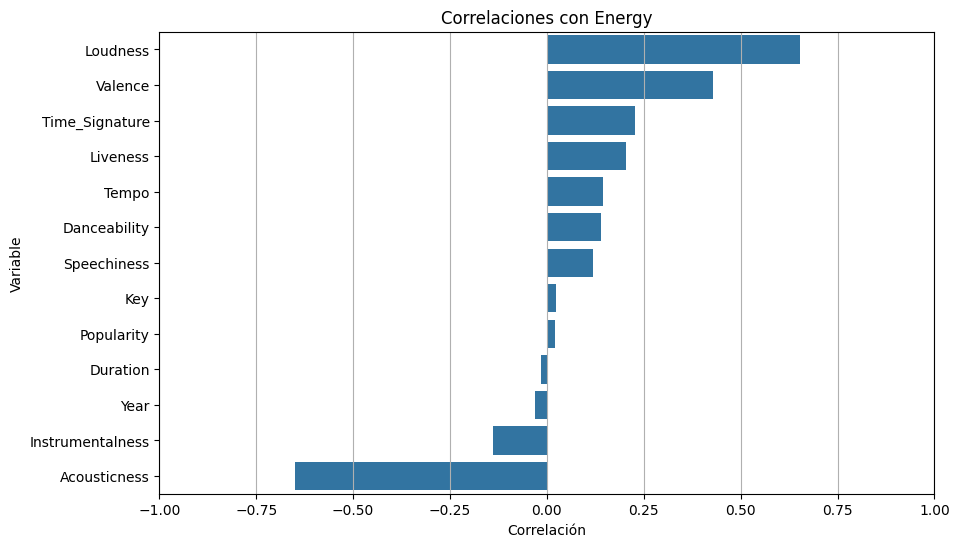

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con MedHouseVal
Energy_correlations = correlation_matrix['Energy'].drop('Energy')

# Ordena las correlaciones de mayor a menor
sorted_correlations = Energy_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con Energy')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

A partir del gráfico de barras que muestra las correlaciones lineales de todas las variables respecto a Energy, podemos observar que Loudness y Acousticness presentan las correlaciones más altas. Valence sigue en orden de magnitud, aunque su correlación es algo menor en comparación. Esto indica que, si bien Valence también tiene cierta relación con la energía percibida de una canción, son principalmente Loudness y Acousticness las que podrían desempeñar un papel más significativo en su predicción y las que nos interesa estudiar.

In [175]:
dataset_covers_procesado_h4 = dataset_covers_procesado[['Loudness', 'Acousticness','Energy']]
dataset_covers_procesado_h4 = dataset_covers_procesado_h4.dropna()

Para comenzar, genero un subconjunto del dataset que contiene únicamente las variables de interés para nuestro estudio y eliminamos las filas que contienen valores nulos. En el caso de la variable Loudness, asignamos valores nulos a ciertos datos durante el análisis univariado, ya que presentaban rangos extremadamente altos o bajos. Según lo investigado, estos valores correspondían a niveles de volumen prácticamente inaudibles para el ser humano.

Retomemos entonces los scatter plot:

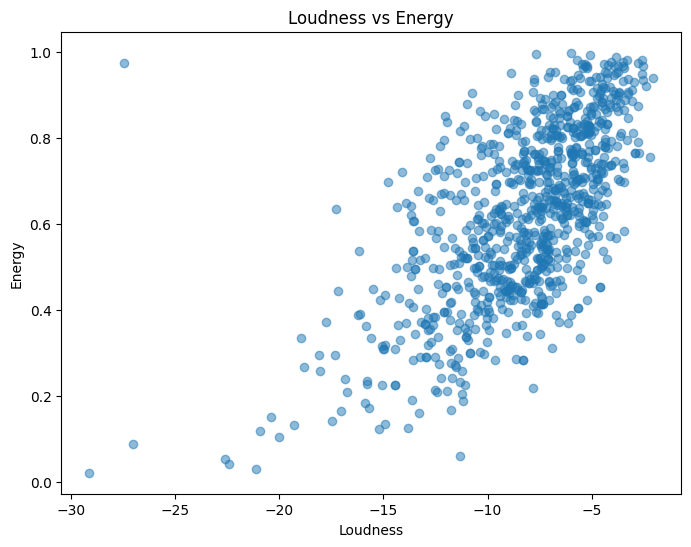

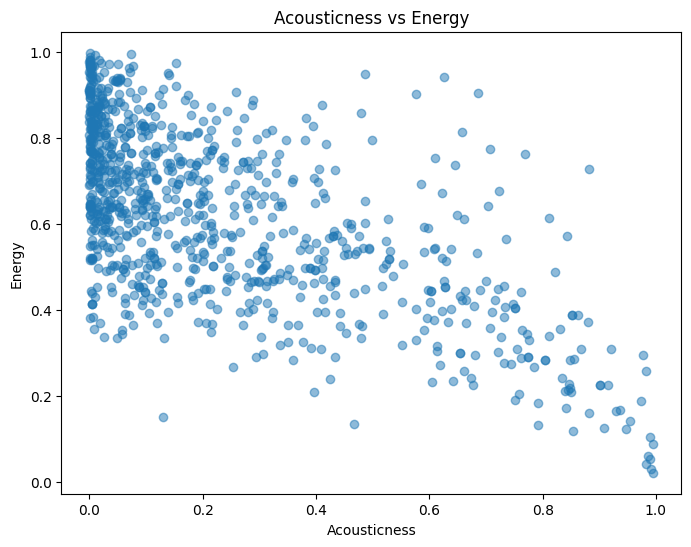

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset_covers_procesado_h4['Loudness'], dataset_covers_procesado_h4['Energy'], alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(dataset_covers_procesado_h4['Acousticness'], dataset_covers_procesado_h4['Energy'], alpha=0.5)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Acousticness vs Energy')
plt.show()

En el primer gráfico (Loudness vs. Energy), aunque la correlación fue moderada (0.65), los puntos sugieren una posible tendencia creciente en forma de curva, en lugar de una relación estrictamente lineal. Esto indica que, si bien a medida que aumenta el volumen promedio (Loudness) también tiende a aumentar la energía (Energy), la relación puede no ajustarse completamente a un modelo lineal simple.

En el segundo gráfico (Acousticness vs. Energy), la correlación negativa de -0.65 sugiere que a mayor calidad acústica (Acousticness), menor es la energía (Energy). Sin embargo, los puntos están más dispersos y no siguen una línea bien definida, lo que puede dificultar la modelación de esta relación de manera precisa usando una simple regresión lineal. 

Este comportamiento disperso puede deberse a la influencia de otros factores adicionales no considerados en estos gráficos.
Ambas visualizaciones sugieren que, aunque existe una correlación moderada, es posible que un modelo de regresión lineal no capture de manera ideal la variabilidad de Energy únicamente en función de Loudness y Acousticness. 

Veamos que sucede. Existen varias implementaciones de modelos lineales pero vamos a trabajar con el paquete statsmodels de Python, que nos ofrece una implementación enfocada en problemas de análisis de datos. Dentro del subpaquete api, disponemos de la librería sm, que incluye varios modelos estándar. De ellos vamos a tomar OLS, Ordinary Least Squares o mínimos cuadrados ordinarios. 

Ademas, como estamos queriendo realizar una regresion lineal multiple debemos estandarizar los datos:

In [177]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = dataset_covers_procesado_h4[['Loudness', 'Acousticness']]
y = dataset_covers_procesado_h4['Energy']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Ver si la estandarizacion funciono

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(X.describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      Loudness  Acousticness
mean -8.261554      0.227921
std   3.487718      0.253433

Medias y desviaciones estándar después del escalado:
          Loudness  Acousticness
mean -2.174338e-16 -2.717923e-17
std   1.000547e+00  1.000547e+00


Vemos que las medias son cercanas a 0 y los desvíos cercanos a 1 asi que ya podemos avanzar y ajustar el regresor.

En la regresión lineal múltiple, donde se incluyen múltiples variables predictoras, el modelo se extiende a:

La regresión lineal múltiple nos permite evaluar cómo cada una de las variables independientes afecta la variable dependiente, controlando el efecto de las demás. Esto es útil cuando queremos entender el impacto combinado de varios factores en la variable de interés, como en este caso. Ajustemos el modelo y revisemos su summary, paso a paso:

In [178]:
import statsmodels.api as sm

# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     629.5
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.72e-172
Time:                        14:54:44   Log-Likelihood:                 566.97
No. Observations:                 915   AIC:                            -1128.
Df Residuals:                     912   BIC:                            -1113.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6252      0.004    145.002   

#### Coeficiente R-squared

El coeficiente de determinación  R2  es una medida estadística que indica qué proporción de la varianza en la variable dependiente (o respuesta) es explicada por el modelo de regresión lineal. De alguna forma,  R2  nos ayuda a entender entonces qué tan bien el modelo ajusta los datos. 

En este caso el modelo de regresión con las variables Loudness y Acousticness explica el 58.2% de la variabilidad en la variable dependiente Energy. El otro 41.8% de la variabilidad en la energía no está explicado por este modelo, lo que sugiere que existen otros factores o características de las canciones (quizá otras propiedades musicales o factores externos) que también afectan la energía y que no están incluidos en este modelo. 

Un valor de 58.2% es moderado, lo cual indica que el modelo tiene un poder predictivo razonable, aunque hay margen para mejorar. Para un modelo simplificado con solo dos variables, un R² de 58.2% puede considerarse aceptable, ya que se ha sacrificado la precisión a cambio de simplicidad y facilidad de interpretación.

#### Significancia F

El estadístico F mide la significancia global del modelo. En términos conceptuales, nos dice si la varianza explicada por el modelo (gracias a las variables independiente Loudness y Acousticness) es significativamente mayor que la varianza residual (o el "ruido" que no puede ser explicado por el modelo).

Si el valor de F es alto, implica que la varianza explicada es considerablemente mayor que la varianza residual, lo que sugiere que el modelo es significativo. "Alto" es algo que por lo general es relativo entre una cosa y otra, así que lo que más nos va a interesar es el p-valor asociado al estadístico.

En este caso, el p-valor es recontra bajo (p<0.001), lo que indica que el modelo en su conjunto es significativo. Esto implica que Loudness y Acousticness son utiles para predecir Energy con una confianza estadística alta.

#### Analisis de los coeficiente del modelo lineal

Vamos a ver la contribucion de las variable al valor de Energy.
* Loudness: tiene un coeficiente de 0.0926 con un valor p < 0.05, lo que significa que es estadísticamente significativo. Esto sugiere que un aumento en Loudness está asociado con un aumento en Energy.
* Acousticness: tiene un coeficiente de -0.0875, también estadísticamente significativo (valor p < 0.05). Esto indica que un aumento en Acousticness se asocia con una disminución en Energy.

Ambos coeficientes son significativos (valores p de 0.000), lo que respalda la hipótesis de que estas variables son predictores válidos para Energy.

#### Supuesto de normalidad de los residuos.

Las pruebas de Omnibus y Jarque-Bera (JB), son pruebas de normalidad de los residuos. Un p-valor bajo (p<0.005) del estadistico Omnibus (Prob(Omnibus)) o del estadistico Jarque-Bera sugieren que los residuos no son normales. Lo cual sucede en este caso porque Prob(Omnibus) es 0.000 y Prob(JB) es 4.43e-21. 

Estos dos test se basan en dos aspectos estadisticos de los datos: Asimetria (tendencia en la distribucion) y Curtosis (mide si los datos tienen colas mas pesadas o ligeras que una distribucion normal). Podemos graficar el histograma de los residuos para ver estas diferencias respecto a la distribucion normal.

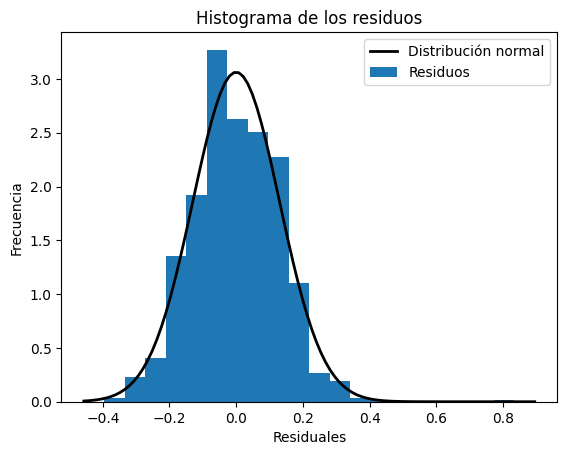

In [179]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

Se ve una silueta en forma de campana desplazada a la izquierda y una cola a la derecha. Concuerda con los resultados arrojados por los tests.

Otra forma de estudiar la validez del modelo es representando gráficamente los valores ajustados por el modelo vs. los residuos. 

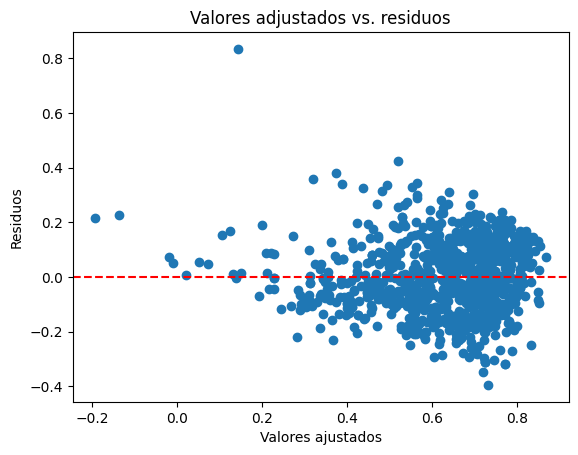

In [180]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

Si se viera una banda alrededor del cero sin demasiados errores por encima o por debajo podriamos decir que los residuos se distribuyen normalmente pero hay una significativa dispersion que impiden asegurarla.

Vemos que a pesar de haber obtenido un valor de  R2  diferente de cero, y bastante alto (0.58), e incluso a pesar de que el  p-valor del modelo sea significativo, la violación de los supuestos nos obliga a descartar la hipótesis de usar Loudness y Acousticness como predictores de Energy.

¿Podremos mejorar esto si usamos más variables?

#### Hipotesis 4.1: Se mejorar la prediccion de Energy agregando la variable Valence al modelo anterior.

In [184]:
dataset_covers_procesado_h4_1 = dataset_covers_procesado[['Loudness', 'Acousticness','Energy', 'Valence']].copy()
dataset_covers_procesado_h4_1 = dataset_covers_procesado_h4_1.dropna()


Hice un subconjunto del dataset con las variables de interés para este modelo, que son 'Loudness', 'Acousticness', 'Energy' y 'Valence', y se eliminaron las filas que contenían valores nulos.

In [185]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = dataset_covers_procesado_h4_1[['Loudness', 'Acousticness', 'Valence']]
y = dataset_covers_procesado_h4_1['Energy']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Ver si la estandarizacion funciono

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(X.describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      Loudness  Acousticness   Valence
mean -8.261554      0.227921  0.533031
std   3.487718      0.253433  0.244964

Medias y desviaciones estándar después del escalado:
          Loudness  Acousticness       Valence
mean -2.174338e-16 -2.717923e-17  3.970109e-16
std   1.000547e+00  1.000547e+00  1.000547e+00


Ajustamos y realizamos el modelo en una escala comparable.

In [186]:
import statsmodels.api as sm

# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     514.6
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.53e-195
Time:                        14:54:44   Log-Likelihood:                 623.68
No. Observations:                 915   AIC:                            -1239.
Df Residuals:                     911   BIC:                            -1220.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6252      0.004    154.189   

#### Análisis del modelo
* R²: El valor de 0.629 indica que aproximadamente el 63% de la variabilidad en la energía se puede explicar por las tres variables independientes. Esto sugiere que el modelo tiene un ajuste razonable, aunque aún existe una parte no explicada por estas variables. Todos los coeficientes del modelo son estadísticamente significativos, ya que los valores p son muy bajos (p < 0.001).

* F: El p-valor asociado al estadístico F es menor a 0.001, lo que indica que el modelo es significativo en su conjunto. Esto significa que al menos una de las variables explicativas tiene un impacto significativo sobre la energía, y por lo tanto, el modelo tiene capacidad predictiva.

* Coeficientes: Los coeficientes de las variables (Loudness, Acousticness y Valence) tienen p-valores menores a 0.001, lo que los hace estadísticamente significativos. Esto sugiere que cada una de estas variables tiene un efecto relevante y medible sobre la energía, y podemos confiar en que las relaciones identificadas no son debidas al azar.

* Residuos: Los resultados de los test de Omnibus y Durbin-Watson indican que los residuos no siguen una distribución normal. Esto sugiere que el modelo puede no estar capturando toda la estructura de los datos, y podría ser necesario realizar ajustes adicionales para mejorar el ajuste y la precisión de las predicciones.

#### Conclusión:

La hipótesis 4, que sugiere que la energía se puede predecir a partir de Loudness y Acousticness, se valida parcialmente con un R² de 58.2%. Este valor indica que el modelo tiene un poder predictivo razonable, aunque existe margen para mejorar. A pesar de que el modelo es relativamente sencillo al considerar solo dos variables, los resultados de la significancia F (p < 0.001) respaldan la utilidad de Loudness y Acousticness como predictores de la energía. Además, los coeficientes de ambas variables son estadísticamente significativos, lo que refuerza la validez de la hipótesis.

Sin embargo, los residuos del modelo no siguen una distribución normal, según lo indicado por los resultados de los tests de Omnibus y Jarque-Bera, lo que sugiere que el modelo podría no estar capturando completamente la variabilidad de los datos. Un análisis más detallado con gráficos como el QQ-plot podría proporcionar más información sobre la distribución de los residuos.

Al añadir la variable Valence en la hipótesis 4.1, el modelo mejora su capacidad predictiva, alcanzando un R² de 0.629. Esto implica que un 63% de la variabilidad de la energía ahora es explicada por las tres variables, lo que es una mejora sobre el modelo simplificado. El p-valor del estadístico F sigue siendo muy bajo, lo que confirma que el modelo con las tres variables es significativo en su conjunto. Además, los coeficientes de Loudness, Acousticness y Valence son todos estadísticamente significativos, lo que sugiere que la adición de Valence mejora la predicción de la energía.

Aunque el modelo con tres variables muestra un ajuste razonable, los resultados de los tests de residuos indican que aún podrían existir desviaciones de la normalidad. Esto sugiere que, aunque la adición de Valence ha mejorado el modelo, podría ser necesario realizar ajustes adicionales para mejorar la precisión y el ajuste global del modelo.

**La hipotesis por lo tanto se acepta parcialmente** ya que podrían explorarse mejoras (como modelos no lineales o la inclusión de otras variables) para aumentar la precisión y capturar completamente la complejidad de la relación. Estos modelos lineales pueden estar ajustados un poco mejor, pero no tienen todo el poder descriptivo que esperabamos.